In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [2]:
from scipy.stats import t
import matplotlib.pyplot as plt

# calculated based on log P Bayes inference

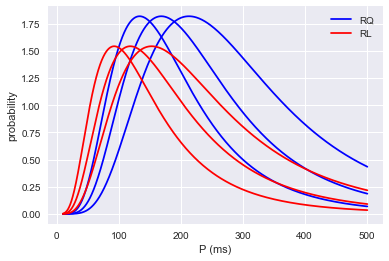

In [3]:
# x is spin period p in millisecond
x = np.linspace(1.,2.7,1000)

# mean mean and mean std pdf for RQ and RL
meanRQ = t.pdf(x, df=39.044, loc=2.227, scale=0.218)
meanRL = t.pdf(x, df=39.044, loc=2.074, scale=0.257)

# 3 simga lower limit mean and mean std pdf for RQ and RL
lowerRQ = t.pdf(x, df=39.044, loc=2.329, scale=0.218)
lowerRL = t.pdf(x, df=39.044, loc=2.185, scale=0.257)

# 3 simga upper limit mean and mean std pdf for RQ and RL
upperRQ = t.pdf(x, df=39.044, loc=2.126, scale=0.218)
upperRL = t.pdf(x, df=39.044, loc=1.967, scale=0.257)

y = 10**x

plt.plot(y, meanRQ, color='blue', label='RQ')
plt.plot(y, lowerRQ, color='blue')
plt.plot(y, upperRQ, color='blue')
plt.plot(y, meanRL, color='red', label='RL')
plt.plot(y, lowerRL, color='red')
plt.plot(y, upperRL, color='red')
plt.legend()
plt.ylabel('probability')
plt.xlabel('P (ms)')
#plt.xlabel('log [P (ms)]')

#  based on Hui+2017

#RQ/#RL detected = 1 happens at p = 145.869321867 ms
3 simga lower limit of #RQ/#RL detected = 1 happens at p = 185.981381531 ms
3 simga upper limit of #RQ/#RL detected = 1 happens at p = 114.408543945 ms


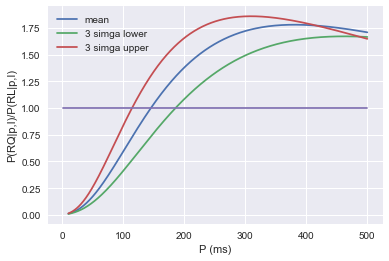

In [5]:
# biased number of RQ and RL detected (Hui+2017)
nRQ = 35
nRL = 42

# P(meanRQ|p,I)/P(meanRL|p,I)
plt.plot(y, meanRQ/meanRL * nRQ/nRL, label='mean')
meanRatio = meanRQ/meanRL * nRQ/nRL
print '#RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))]), 'ms'

plt.plot(y, lowerRQ/lowerRL * nRQ/nRL, label='3 simga lower')
lowerRatio = lowerRQ/lowerRL * nRQ/nRL
print '3 simga lower limit of #RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(lowerRatio)), key=lambda i:abs(lowerRatio[i]-1.))]), 'ms'

plt.plot(y, upperRQ/upperRL * nRQ/nRL, label='3 simga upper')
upperRatio = upperRQ/upperRL * nRQ/nRL
print '3 simga upper limit of #RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(upperRatio)), key=lambda i:abs(upperRatio[i]-1.))]), 'ms'

plt.plot([1,500],[1,1])

plt.legend()
plt.ylabel('P(RQ|p,I)/P(RL|p,I)')
plt.xlabel('P (ms)')
#plt.xlabel('log [P (ms)]')

In [6]:
# r = area of cone section/2pi = probability of pulsars to be detected as RL (see below definition)
print 'minimum #RQ/#RL should be detected =', np.min(meanRatio), 'happens when p -> 0 ms'
print 'which means r =', 1./(np.min(meanRatio)+1)
print ''
print 'maximum #RQ/#RL should be detected =', np.max(meanRatio), 'happens when p ~ 400 ms'
print 'which means r =', 1./(np.max(meanRatio)+1)
print ''
print '#RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))]), 'ms'
print 'which means r =', 1./(1+1)

minimum #RQ/#RL should be detected = 0.0109922368262 happens when p -> 0 ms
which means r = 0.989127278701

maximum #RQ/#RL should be detected = 1.77920786862 happens when p ~ 400 ms
which means r = 0.359814755597

#RQ/#RL detected = 1 happens at p = 145.869321867 ms
which means r = 0.5


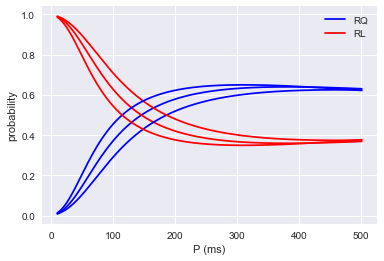

In [7]:
# probability of RQ to RL should be detected at each value of p
# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
meanProb =  meanRQ/meanRL * nRQ/nRL
plt.plot(y, meanProb/(1+meanProb), label='RQ', color='blue')
plt.plot(y, 1 /(1+meanProb), label='RL', color='red')

lowerProb =  lowerRQ/lowerRL * nRQ/nRL
plt.plot(y, lowerProb/(1+lowerProb), color='blue')
plt.plot(y, 1 /(1+lowerProb), color='red')

upperProb =  upperRQ/upperRL * nRQ/nRL
plt.plot(y, upperProb/(1+upperProb), color='blue')
plt.plot(y, 1 /(1+upperProb), color='red')

plt.legend()
plt.ylabel('probability')
plt.xlabel('P (ms)')
#plt.xlabel('log [P (ms)]')

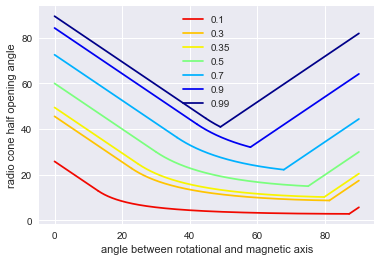

In [8]:
def opening_angle_1(alpha,r):
    return np.arccos(1.-r)-alpha

def opening_angle_2(alpha,r):
    return np.arcsin(0.5*r/np.sin(alpha))

def opening_angle_3(alpha,r):
    return alpha - np.arccos(r)

# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
# r = area of cone section/2pi = probability of pulsars to be detected as RL
# r = 0.5 corresponds to #RQ/#RL detected = 1 at p = 154.592773642 ms
r = [0.1,0.3,0.35,0.5,0.7,0.9,0.99]
cmap = plt.get_cmap('jet_r')
# alpha = angle between rotational and magnetic axis
# delta = radio cone half opening angle
# we have 2 sin(alpha) sin(delta) = r
# lower limit of alpha = delta, alpha = arcsin(sqrt(r/2))
# upper limit of alpha = pi/2 - delta, alpha = pi/2 - 1/2 arcsin(r)
for i in r:
    color = cmap(i)
    
    alpha = np.linspace(0., 0.5*np.arccos(1.-i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_1(alpha,i)*180./np.pi, c=color, label=i)
    
    alpha = np.linspace(np.arcsin(np.sqrt(0.5*i)), 0.5*np.pi - 0.5*np.arcsin(i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_2(alpha,i)*180./np.pi, c=color)
    
    alpha = np.linspace(0.25*np.pi + 0.5*np.arccos(i), 0.5*np.pi, 1000)
    plt.plot(alpha*180./np.pi, opening_angle_3(alpha,i)*180./np.pi, c=color)
    
plt.legend()
plt.ylabel('radio cone half opening angle')
plt.xlabel('angle between rotational and magnetic axis')

# based on Sokolova+2016

#RQ/#RL detected = 1 happens at p = 90.0854504884 ms
3 simga lower limit of #RQ/#RL detected = 1 happens at p = 112.629369167 ms
3 simga upper limit of #RQ/#RL detected = 1 happens at p = 71.772149974 ms


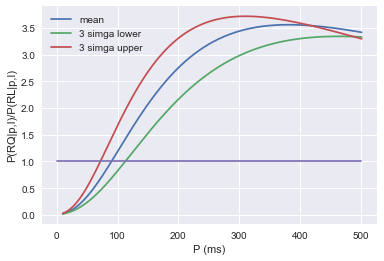

In [9]:
# biased number of RQ and RL detected (Sokolova+2016)
nRQ = 25
nRL = 15

# P(meanRQ|p,I)/P(meanRL|p,I)
plt.plot(y, meanRQ/meanRL * nRQ/nRL, label='mean')
meanRatio = meanRQ/meanRL * nRQ/nRL
print '#RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))]), 'ms'

plt.plot(y, lowerRQ/lowerRL * nRQ/nRL, label='3 simga lower')
lowerRatio = lowerRQ/lowerRL * nRQ/nRL
print '3 simga lower limit of #RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(lowerRatio)), key=lambda i:abs(lowerRatio[i]-1.))]), 'ms'

plt.plot(y, upperRQ/upperRL * nRQ/nRL, label='3 simga upper')
upperRatio = upperRQ/upperRL * nRQ/nRL
print '3 simga upper limit of #RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(upperRatio)), key=lambda i:abs(upperRatio[i]-1.))]), 'ms'

plt.plot([1,500],[1,1])

plt.legend()
plt.ylabel('P(RQ|p,I)/P(RL|p,I)')
plt.xlabel('P (ms)')
#plt.xlabel('log [P (ms)]')

In [10]:
# r = area of cone section/2pi = probability of pulsars to be detected as RL (see below definition)
print 'minimum #RQ/#RL should be detected =', np.min(meanRatio), 'happens when p -> 0 ms'
print 'which means r =', 1./(np.min(meanRatio)+1)
print ''
print 'maximum #RQ/#RL should be detected =', np.max(meanRatio), 'happens when p ~ 400 ms'
print 'which means r =', 1./(np.max(meanRatio)+1)
print ''
print '#RQ/#RL detected = 1 happens at p =', 10**(x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))]), 'ms'
print 'which means r =', 1./(1+1)

minimum #RQ/#RL should be detected = 0.0219844736525 happens when p -> 0 ms
which means r = 0.978488446528

maximum #RQ/#RL should be detected = 3.55841573723 happens when p ~ 400 ms
which means r = 0.219374462016

#RQ/#RL detected = 1 happens at p = 90.0854504884 ms
which means r = 0.5


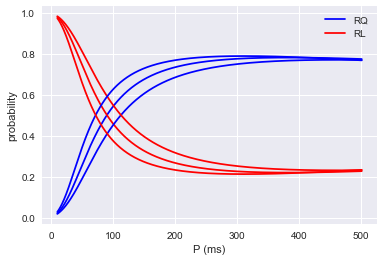

In [11]:
# probability of RQ to RL should be detected at each value of p
# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
meanProb =  meanRQ/meanRL * nRQ/nRL
plt.plot(y, meanProb/(1+meanProb), label='RQ', color='blue')
plt.plot(y, 1 /(1+meanProb), label='RL', color='red')

lowerProb =  lowerRQ/lowerRL * nRQ/nRL
plt.plot(y, lowerProb/(1+lowerProb), color='blue')
plt.plot(y, 1 /(1+lowerProb), color='red')

upperProb =  upperRQ/upperRL * nRQ/nRL
plt.plot(y, upperProb/(1+upperProb), color='blue')
plt.plot(y, 1 /(1+upperProb), color='red')

plt.legend()
plt.ylabel('probability')
plt.xlabel('P (ms)')
#plt.xlabel('log [P (ms)]')

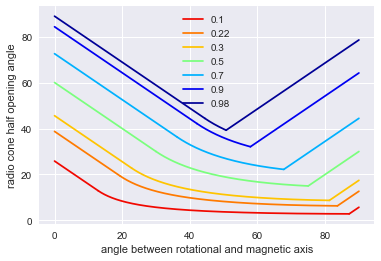

In [12]:
def opening_angle_1(alpha,r):
    return np.arccos(1.-r)-alpha

def opening_angle_2(alpha,r):
    return np.arcsin(0.5*r/np.sin(alpha))

def opening_angle_3(alpha,r):
    return alpha - np.arccos(r)

# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
# r = area of cone section/2pi = probability of pulsars to be detected as RL
# r = 0.5 corresponds to #RQ/#RL detected = 1 at p = 154.592773642 ms
r = [0.1,0.22,0.3,0.5,0.7,0.9,0.98]
cmap = plt.get_cmap('jet_r')
# alpha = angle between rotational and magnetic axis
# delta = radio cone half opening angle
# we have 2 sin(alpha) sin(delta) = r
# lower limit of alpha = delta, alpha = arcsin(sqrt(r/2))
# upper limit of alpha = pi/2 - delta, alpha = pi/2 - 1/2 arcsin(r)
for i in r:
    color = cmap(i)
    
    alpha = np.linspace(0., 0.5*np.arccos(1.-i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_1(alpha,i)*180./np.pi, c=color, label=i)
    
    alpha = np.linspace(np.arcsin(np.sqrt(0.5*i)), 0.5*np.pi - 0.5*np.arcsin(i), 1000)
    plt.plot(alpha*180./np.pi, opening_angle_2(alpha,i)*180./np.pi, c=color)
    
    alpha = np.linspace(0.25*np.pi + 0.5*np.arccos(i), 0.5*np.pi, 1000)
    plt.plot(alpha*180./np.pi, opening_angle_3(alpha,i)*180./np.pi, c=color)
    
plt.legend()
plt.ylabel('radio cone half opening angle')
plt.xlabel('angle between rotational and magnetic axis')

# calculated based on linear P Bayes 

## probably doesn't make physical sense because when p = 0 ms all pulsaer should be RL

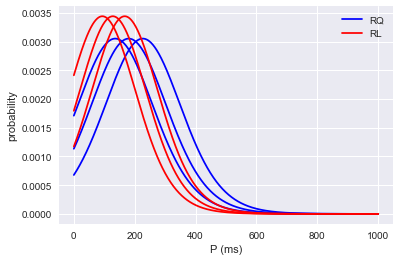

In [67]:
# x is spin period p in millisecond
x = np.linspace(0.,1000.,1000)

# mean mean and 3 simga upper limit std pdf for RQ and RL
meanRQ = t.pdf(x, df=13.2, loc=180.3, scale=128.3)
meanRL = t.pdf(x, df=13.2, loc=128.1, scale=113.8)

# 3 simga lower limit mean and 3 simga upper limit std pdf for RQ and RL
lowerRQ = t.pdf(x, df=13.2, loc=135.9, scale=128.3)
lowerRL = t.pdf(x, df=13.2, loc=93.6, scale=113.8)

# 3 simga upper limit mean and 3 simga upper limit std pdf for RQ and RL
upperRQ = t.pdf(x, df=13.2, loc=226.5, scale=128.3)
upperRL = t.pdf(x, df=13.2, loc=167.2, scale=113.8)

plt.plot(x, meanRQ, color='blue', label='RQ')
plt.plot(x, lowerRQ, color='blue')
plt.plot(x, upperRQ, color='blue')
plt.plot(x, meanRL, color='red', label='RL')
plt.plot(x, lowerRL, color='red')
plt.plot(x, upperRL, color='red')
plt.legend()
plt.ylabel('probability')
plt.xlabel('P (ms)')

#RQ/#RL detected = 1 happens at p = 222.222222222 ms
3 simga lower limit of #RQ/#RL detected = 1 happens at p = 195.195195195 ms
3 simga upper limit of #RQ/#RL detected = 1 happens at p = 258.258258258 ms


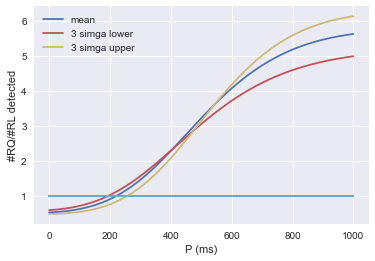

In [93]:
# biased number of RQ and RL detected
nRQ = 35
nRL = 42

# relative frequency of meanRQ:meanRL should be detected given p
plt.plot(x, meanRQ/meanRL * 35/42, label='mean')
#plt.plot([0,1000],[1,1])
meanRatio = meanRQ/meanRL * 35/42
print '#RQ/#RL detected = 1 happens at p =', x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))], 'ms'

# relative frequency of lowerRQ:lowerRL should be detected given p
plt.plot(x, lowerRQ/lowerRL * 35/42, label='3 simga lower')
#plt.plot([0,1000],[1,1])
lowerRatio = lowerRQ/lowerRL * 35/42
print '3 simga lower limit of #RQ/#RL detected = 1 happens at p =', x[min(range(len(lowerRatio)), key=lambda i:abs(lowerRatio[i]-1.))], 'ms'

# relative frequency of upperRQ:upperRL should be detected given p
plt.plot(x, upperRQ/upperRL * 35/42, label='3 simga upper')
plt.plot([0,1000],[1,1])
upperRatio = upperRQ/upperRL * 35/42
print '3 simga upper limit of #RQ/#RL detected = 1 happens at p =', x[min(range(len(upperRatio)), key=lambda i:abs(upperRatio[i]-1.))], 'ms'

plt.legend()
plt.ylabel('#RQ/#RL detected')
plt.xlabel('P (ms)')

In [95]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

print strictly_increasing(meanRatio)
print strictly_increasing(lowerRatio)
print strictly_increasing(upperRatio)

True
True
True


In [114]:
# r = area of cone section/2pi = probability of pulsars to be detected as RL (see below definition)
print 'minimum #RQ/#RL should be detected =', np.min(meanRatio), 'happens when p = 0 ms'
print 'which means r =', 1./(np.min(meanRatio)+1)
print ''
print 'maximum #RQ/#RL should be detected =', np.max(meanRatio), 'happens when p = 1000 ms'
print 'which means r =', 1./(np.max(meanRatio)+1)
print ''
print '#RQ/#RL detected = 1 happens at p =', x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-1.))], 'ms'
print 'which means r =', 1./(1+1)
print ''
print '#RQ/#RL detected = 2.3 happens at p =', x[min(range(len(meanRatio)), key=lambda i:abs(meanRatio[i]-2.3))], 'ms'
print 'which means r =', 1./(2.3+1)
print ''

minimum #RQ/#RL should be detected = 0.526571866018 happens when p = 0 ms
which means r = 0.655062511147

maximum #RQ/#RL should be detected = 5.63018128074 happens when p = 1000 ms
which means r = 0.15082543865

#RQ/#RL detected = 1 happens at p = 222.222222222 ms
which means r = 0.5

#RQ/#RL detected = 2.3 happens at p = 402.402402402 ms
which means r = 0.30303030303



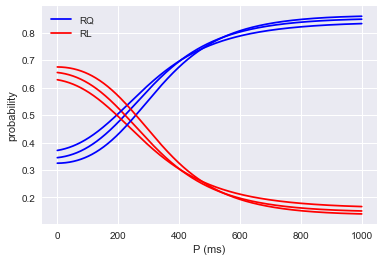

In [69]:
# probability of RQ to RL should be detected at each value of p
# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
meanProb =  meanRQ/meanRL * 35/42
plt.plot(x, meanProb/(1+meanProb), label='RQ', color='blue')
plt.plot(x, 1 /(1+meanProb), label='RL', color='red')

lowerProb =  lowerRQ/lowerRL * 35/42
plt.plot(x, lowerProb/(1+lowerProb), color='blue')
plt.plot(x, 1 /(1+lowerProb), color='red')

upperProb =  upperRQ/upperRL * 35/42
plt.plot(x, upperProb/(1+upperProb), color='blue')
plt.plot(x, 1 /(1+upperProb), color='red')

plt.legend()
plt.ylabel('probability')
plt.xlabel('P (ms)')

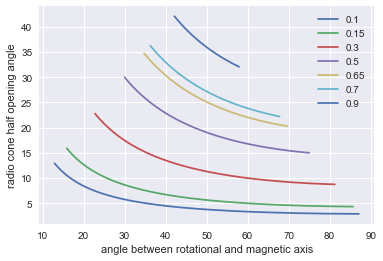

In [116]:
def opening_angle(alpha,r):
    return np.arcsin(0.5*r/np.sin(alpha))

# assuming no unknown case, i.e., assuming #RQ + #RL = total gamma-ray pulsars
# r = area of cone section/2pi = probability of pulsars to be detected as RL
# r = 0.5 corresponds to #RQ/#RL detected = 1 at p = 222.222222222 ms
r = [0.1,0.15,0.3,0.5,0.65,0.7,0.9]

# alpha = angle between rotational and magnetic axis
# delta = radio cone half opening angle
# we have 2 sin(alpha) sin(delta) = r
# lower limit of alpha = delta, alpha = arcsin(sqrt(r/2))
# upper limit of alpha = pi/2 - delta, alpha = pi/2 - 1/2 arcsin(r)
for i in r:
    alpha = np.linspace(np.arcsin(np.sqrt(0.5*i)), 0.5*np.pi - 0.5*np.arcsin(i),1000)
    plt.plot(alpha*180./np.pi, opening_angle(alpha,i)*180./np.pi, label=i)
    
plt.legend()
plt.ylabel('radio cone half opening angle')
plt.xlabel('angle between rotational and magnetic axis')

# import the data

In [2]:
loudFile = open('radio-loud.txt','r')
loudRows = (loudRow.strip().split() for loudRow in loudFile)
lR = zip(*loudRows)

In [3]:
quietFile = open('radio-quiet.txt','r')
quietRows = (quietRow.strip().split() for quietRow in quietFile)
qR = zip(*quietRows)

# P

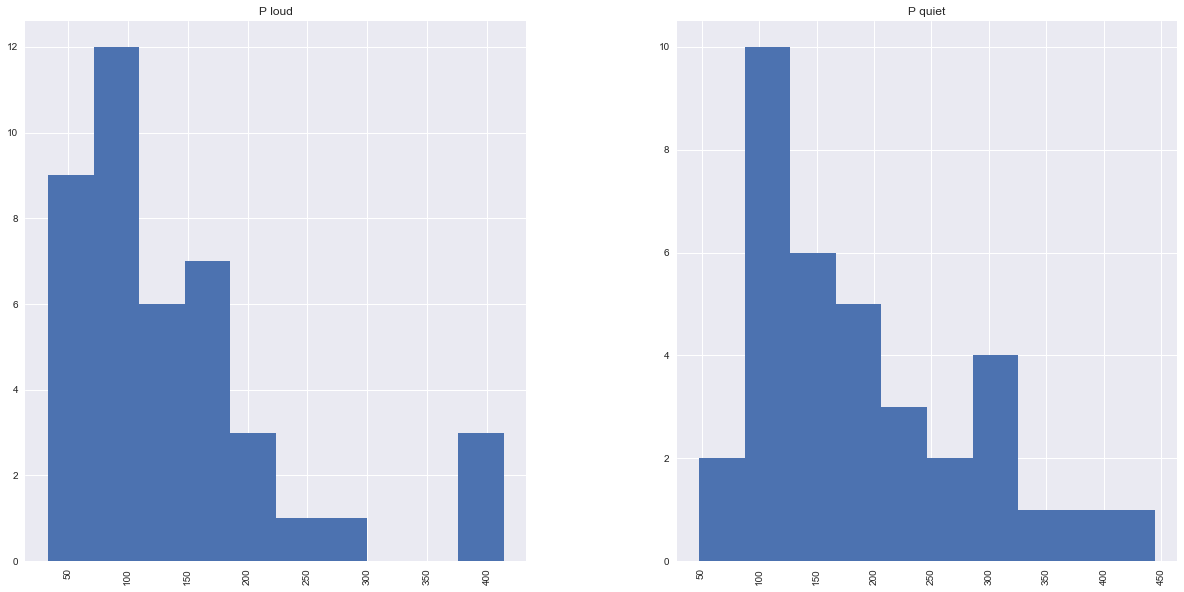

In [4]:
P_quiet = np.array(map(float, qR[1]))
P_loud = np.array(map(float, lR[1]))

y1 = P_quiet
y2 = P_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['P quiet']*len(P_quiet), ['P loud']*len(P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [6]:
P_quiet, P_loud

(array([ 315.9,   83.2,  444.1,  333.2,  297.4,  237.1,  155.1,  111.5,
         139. ,  114.5,  109.7,  110.6,  115.8,  103.2,  171.9,  196.5,
         199.5,  106.3,  146.8,   48.1,  110.2,  173.3,  145.7,  225.6,
         106.6,   92.7,  374.8,  290.4,  265.3,  176.7,  227.1,  319.6,
         157.8,  282.8,  162.7]),
 array([  65.7,  217.1,   33.6,  287.8,  384.9,  251.7,  166.8,   89.4,
         106.8,   87.6,  107.4,  162.5,   91.4,  123.7,  197.1,   63.2,
          65. ,  408.7,  135.5,  166.2,   50.1,   68.2,   88.9,  151.5,
          84.2,  165. ,  182.2,  102.5,   74.7,  139.5,  413.7,   98.8,
         125. ,   61.9,  165.9,   39.5,  103.7,  200.1,  143.2,   96.1,
          51.6,  139.9]))

In [5]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [6]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:28<00:00, 669.51it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x114871990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1155b9690>], dtype=object)

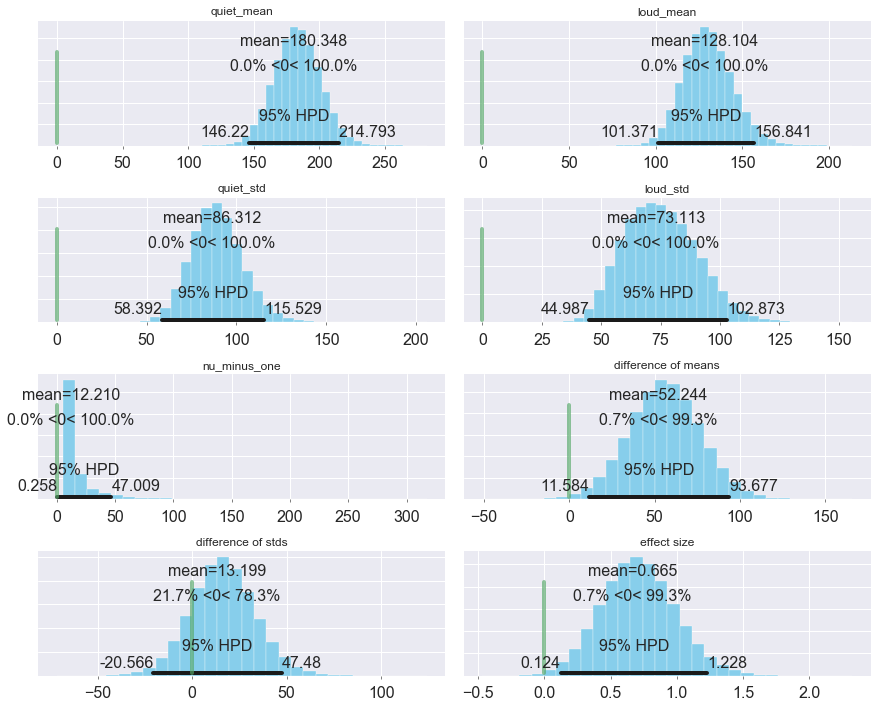

In [9]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118b7db10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120836e50>], dtype=object)

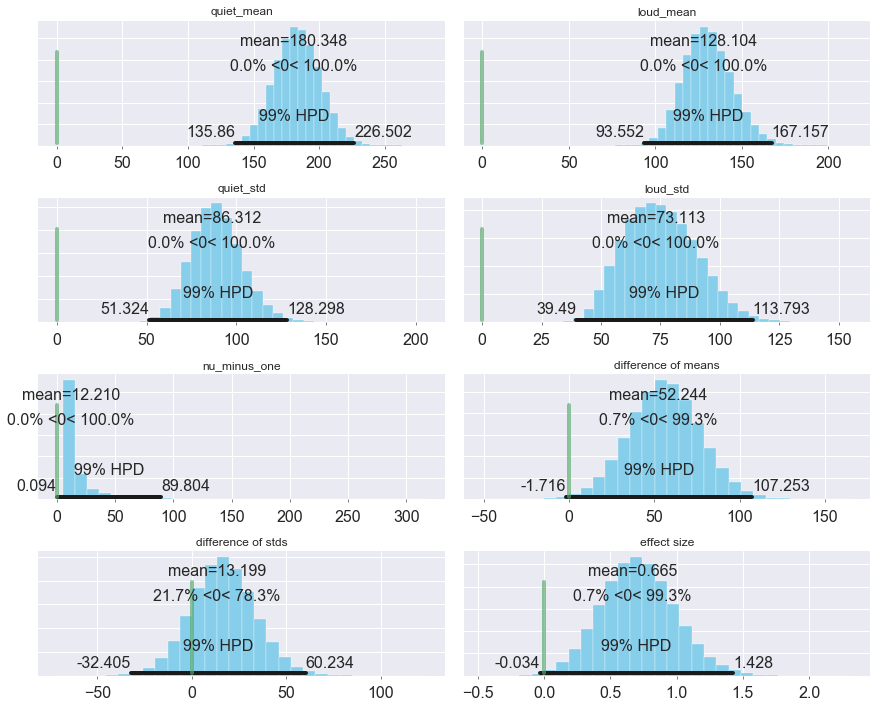

In [11]:
pm.plot_posterior(trace, alpha_level=0.01,
                  ref_val=0,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  color='#87ceeb')

# P dot

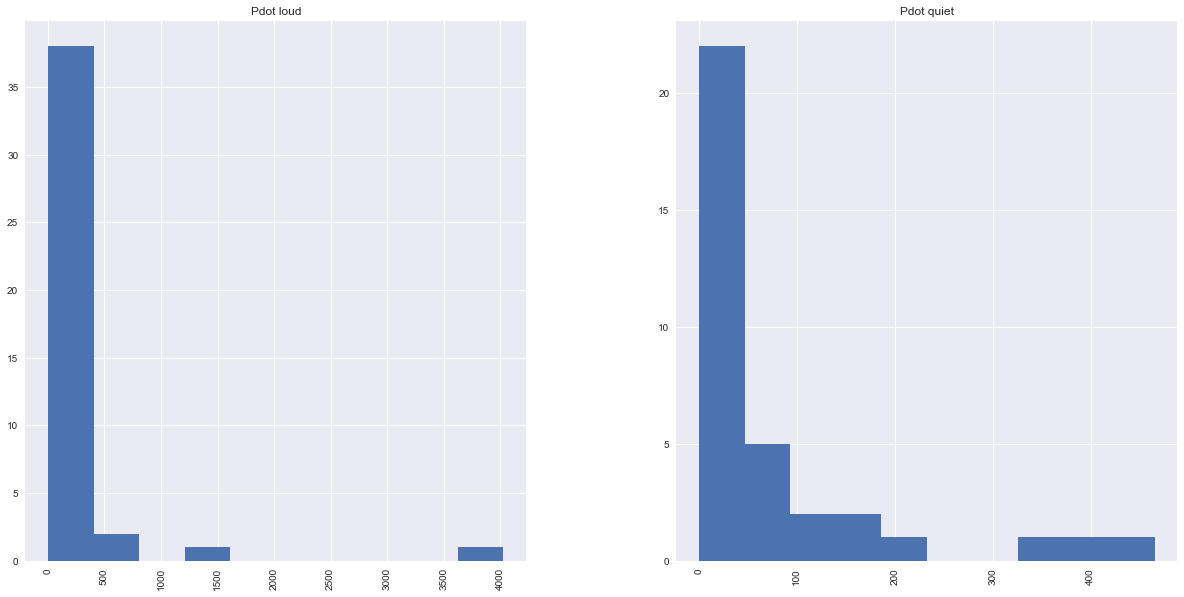

In [12]:
Pdot_quiet = np.array(map(float, qR[2]))
Pdot_loud = np.array(map(float, lR[2]))

y1 = Pdot_quiet
y2 = Pdot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Pdot quiet']*len(Pdot_quiet), ['Pdot loud']*len(Pdot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [13]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [14]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:21<00:00, 683.31it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1197f7e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1169ebe10>], dtype=object)

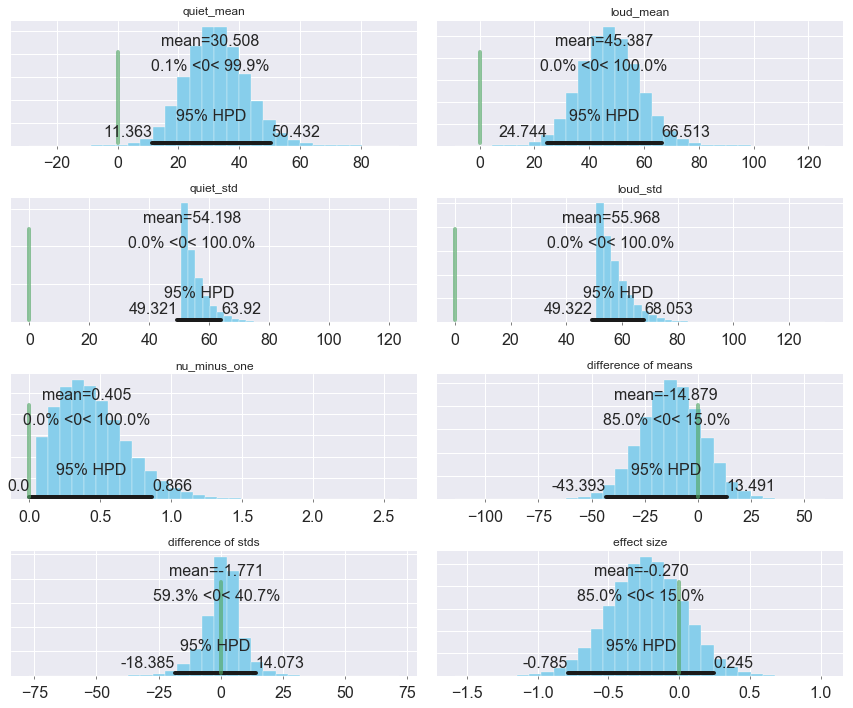

In [15]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d3a0050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1246a48d0>], dtype=object)

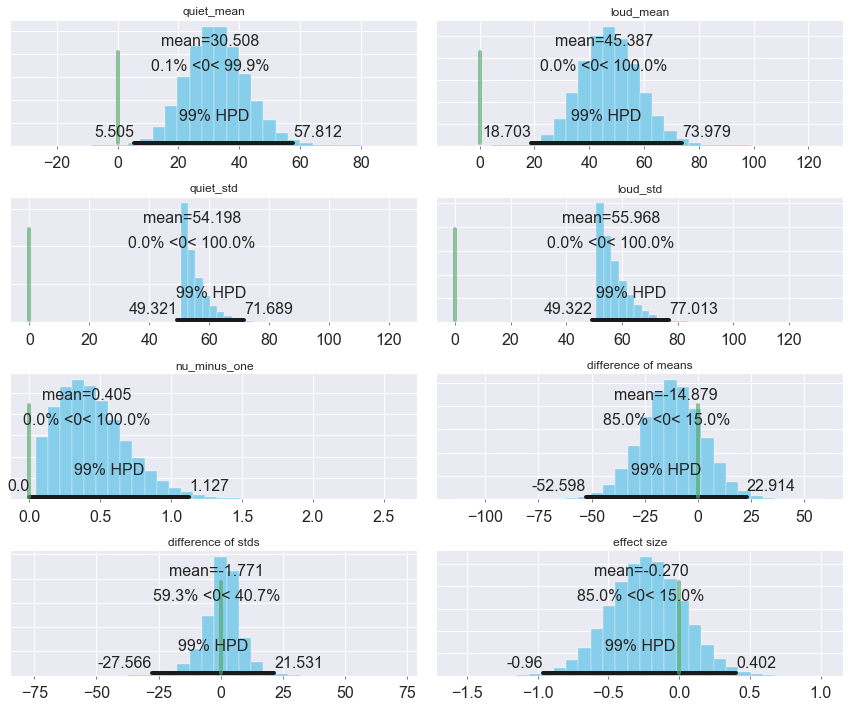

In [16]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Bs

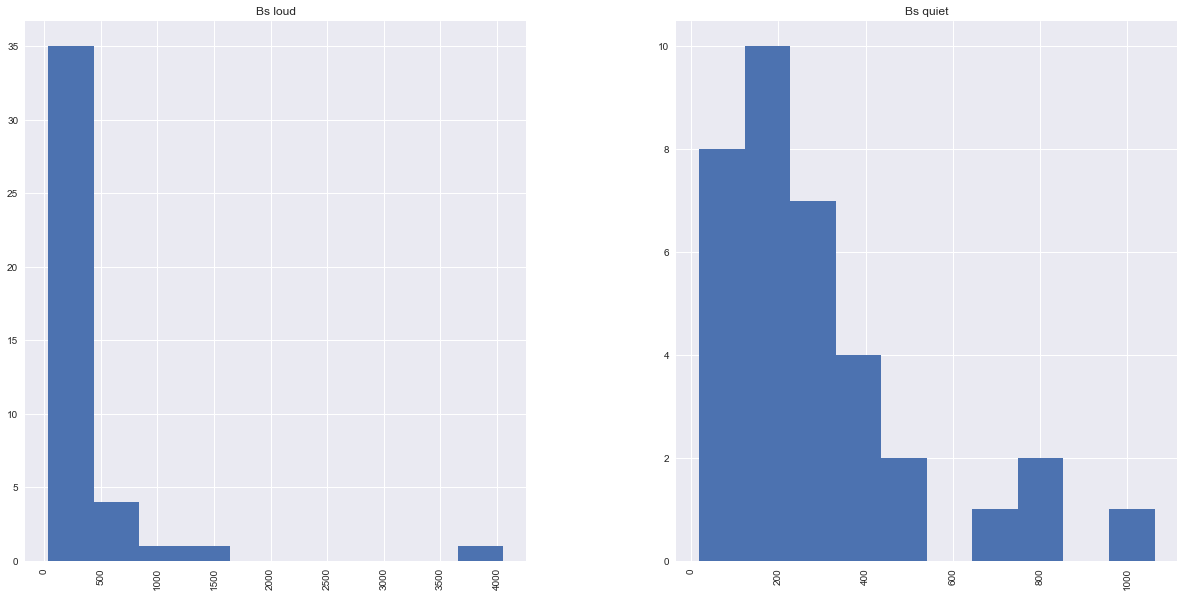

In [17]:
Bs_quiet = np.array(map(float, qR[3]))
Bs_loud = np.array(map(float, lR[3]))

y1 = Bs_quiet
y2 = Bs_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Bs quiet']*len(Bs_quiet), ['Bs loud']*len(Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [18]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [19]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:05<00:00, 720.86it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a7bea50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119dbb790>], dtype=object)

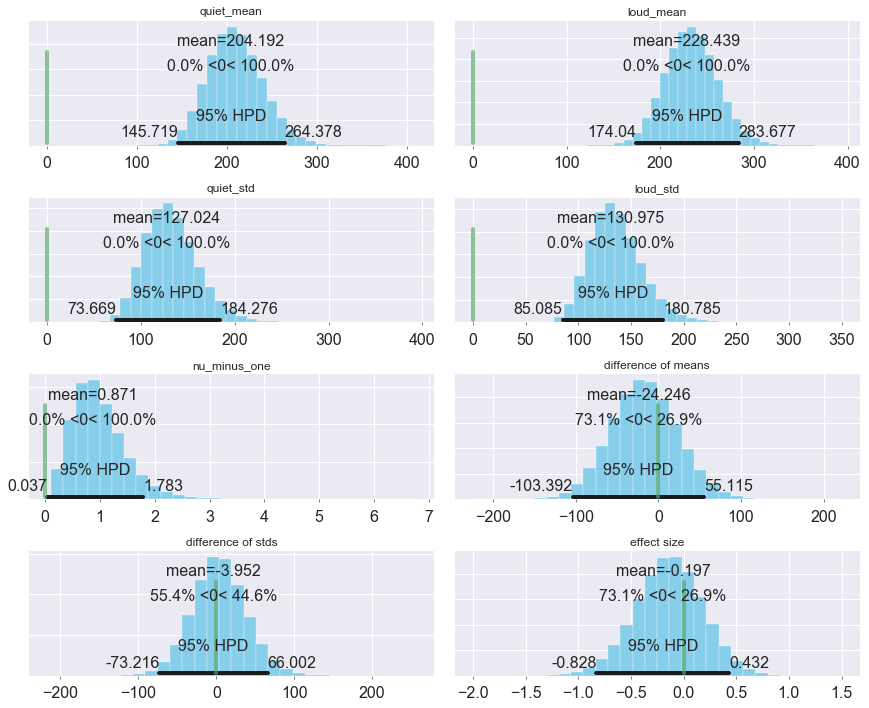

In [20]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119e9f490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b2f0310>], dtype=object)

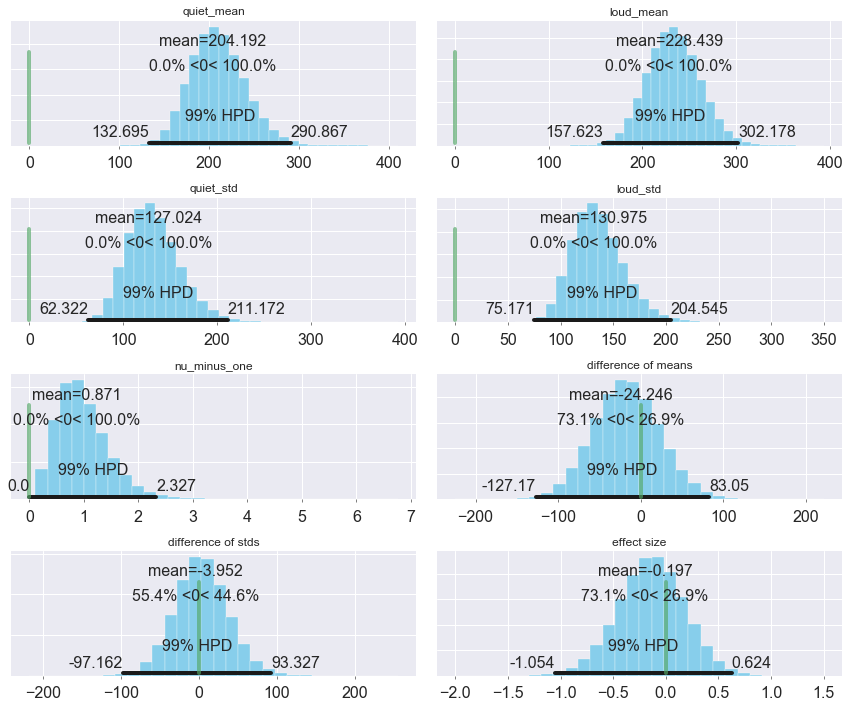

In [21]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Blc

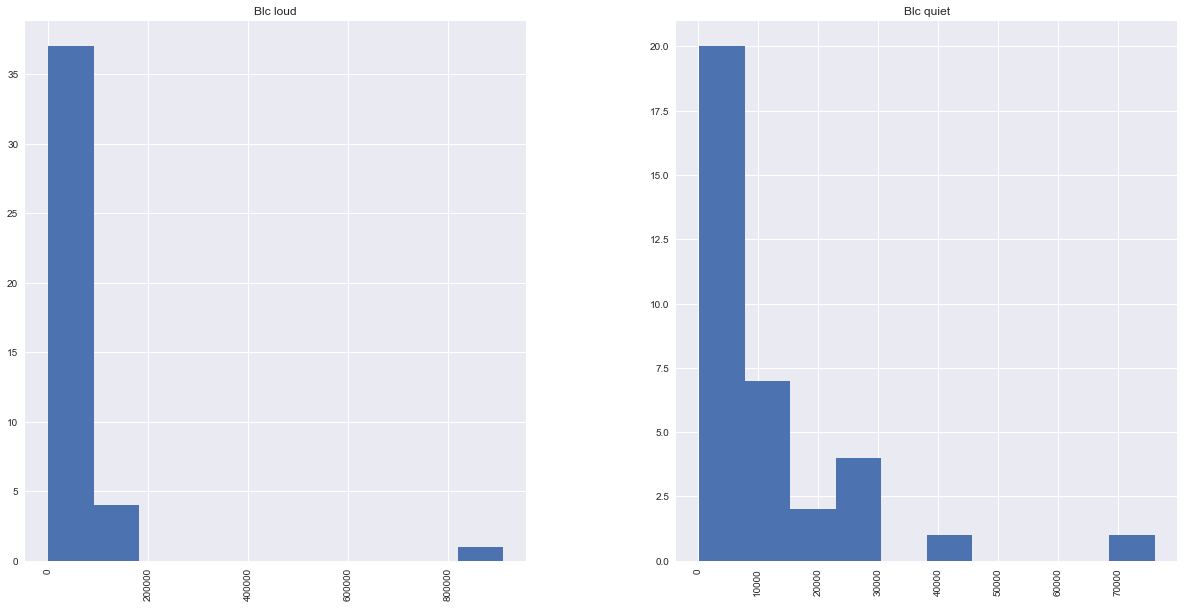

In [22]:
Blc_quiet = np.array(map(float, qR[4]))
Blc_loud = np.array(map(float, lR[4]))

y1 = Blc_quiet
y2 = Blc_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Blc quiet']*len(Blc_quiet), ['Blc loud']*len(Blc_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [23]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [25]:
with model:
    trace = pm.sample(200000, tune=30000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 230000/230000 [05:41<00:00, 672.77it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1269c1ed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11bc113d0>], dtype=object)

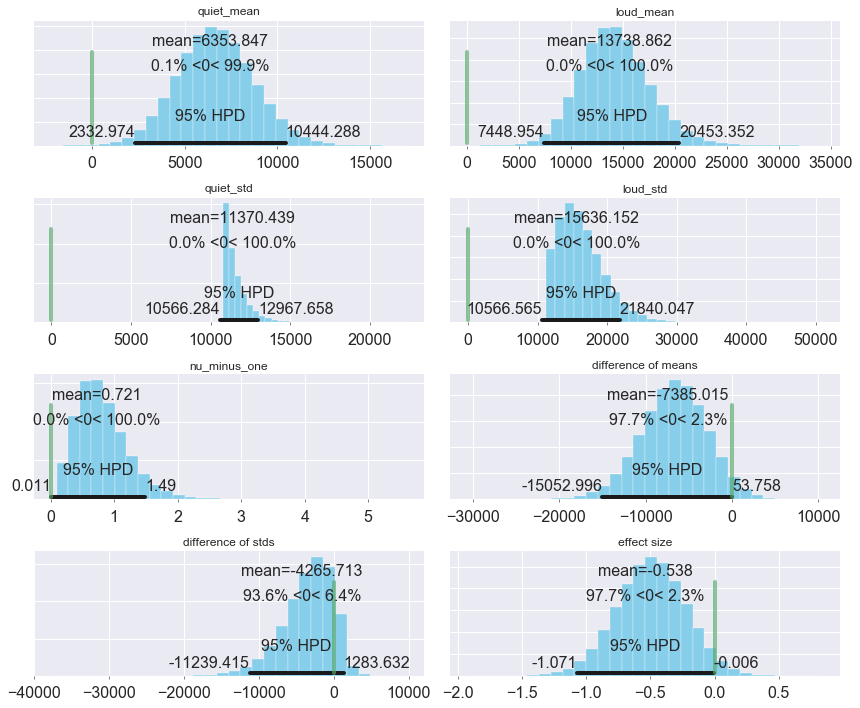

In [26]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124d6bc90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117180f90>], dtype=object)

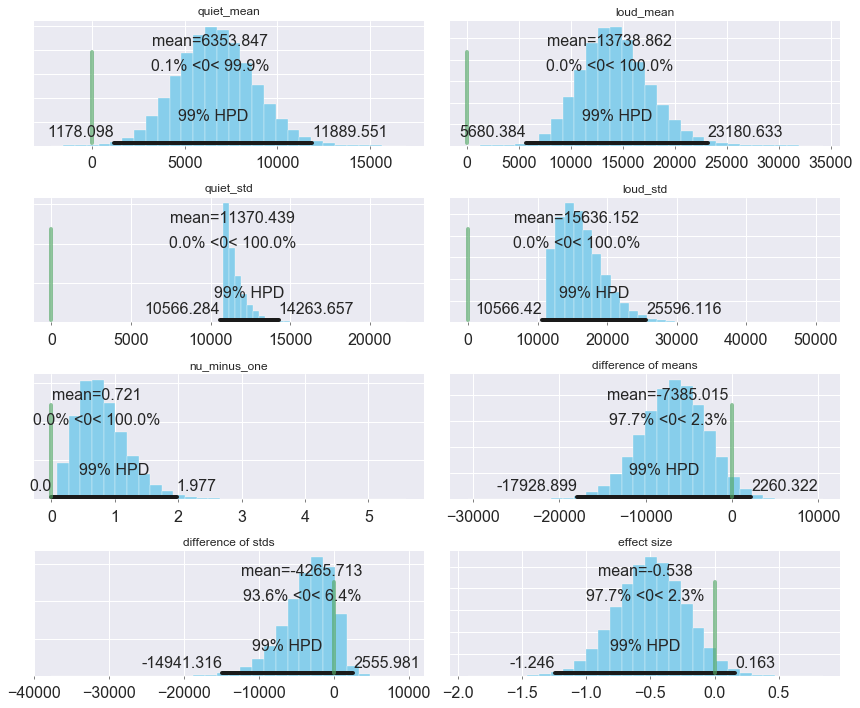

In [27]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Edot

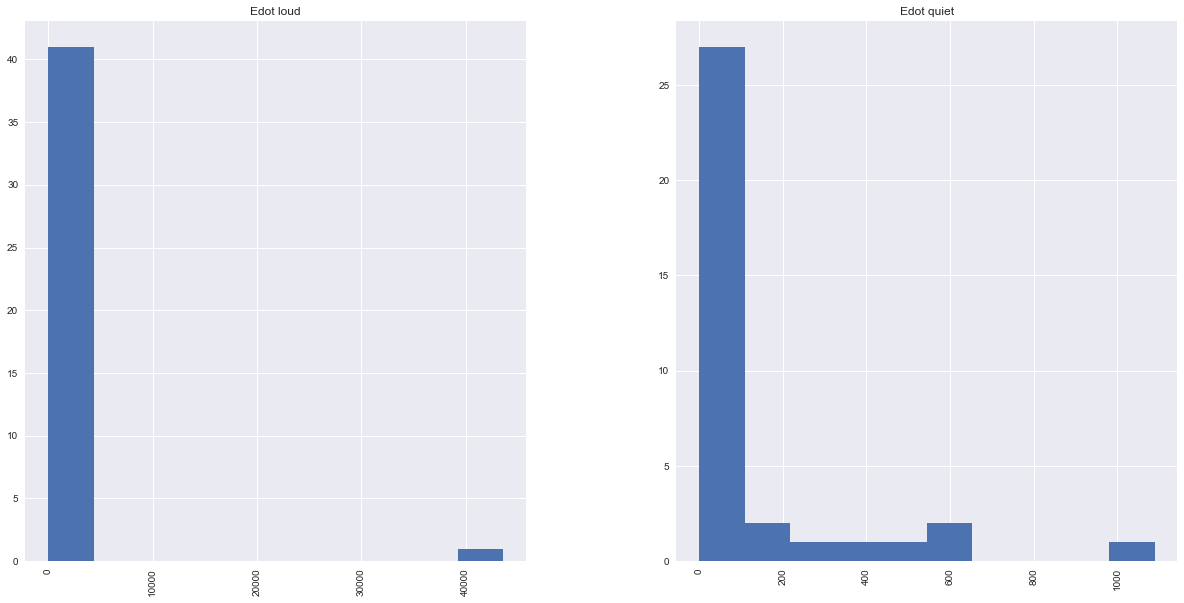

In [28]:
Edot_quiet = np.array(map(float, qR[5]))
Edot_loud = np.array(map(float, lR[5]))

y1 = Edot_quiet
y2 = Edot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Edot quiet']*len(Edot_quiet), ['Edot loud']*len(Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [29]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [30]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:08<00:00, 713.13it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1271f8d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11dda0e50>], dtype=object)

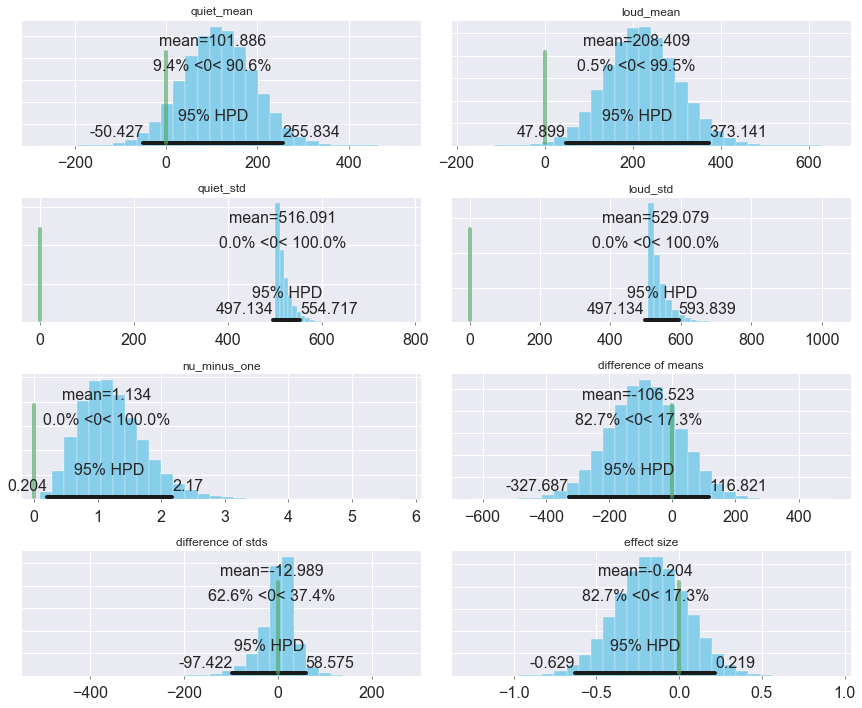

In [31]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11de88510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e82bb90>], dtype=object)

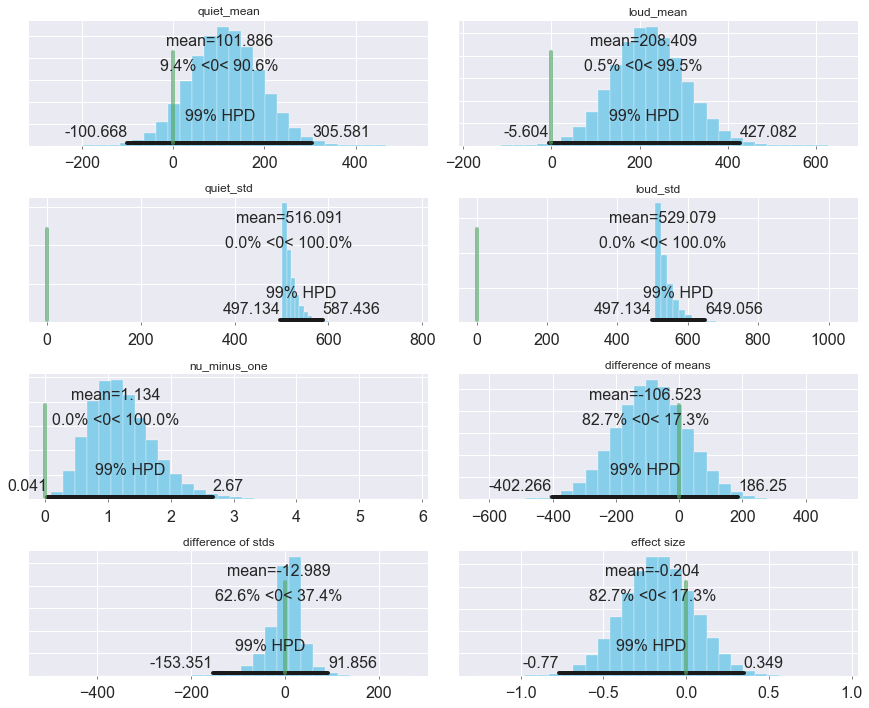

In [32]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Variability Index

In [36]:
tmp = []
for i in lR[6]:
    if i[0]!='>' and i!='middot':
        tmp.append(i)
print tmp

['37.4', '66.6', '621.9', '42.5', '45.3', '32.6', '58.3', '20.0', '47.3', '46.6', '63.7', '71.1', '56.6', '34.9', '56.1', '73.5', '62.7', '36.0', '54.6', '35.4', '56.7', '52.7', '60.2', '36.3', '54.1', '68.9', '48.8', '60.1', '56.0', '49.1', '46.8', '31.1', '38.3', '50.6', '45.3', '52.8']


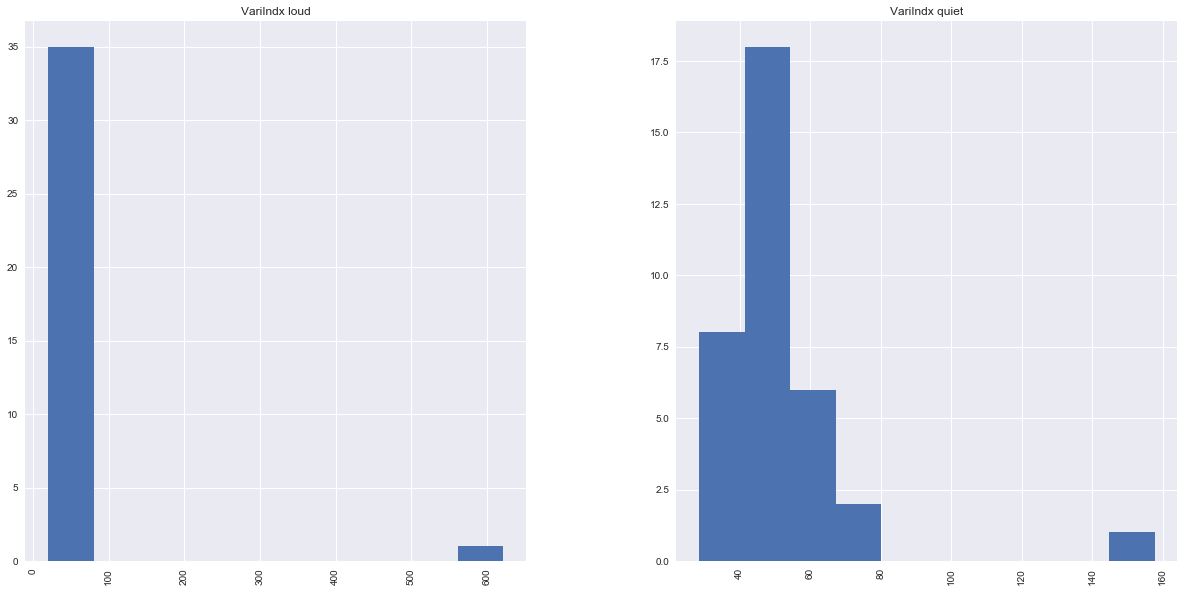

In [37]:
VariIndx_quiet = np.array(map(float, qR[6]))
VariIndx_loud = np.array(map(float, tmp))

y1 = VariIndx_quiet
y2 = VariIndx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['VariIndx quiet']*len(VariIndx_quiet), ['VariIndx loud']*len(VariIndx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [38]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [43]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [06:00<00:00, 694.15it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1245f4690>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x123b77f90>], dtype=object)

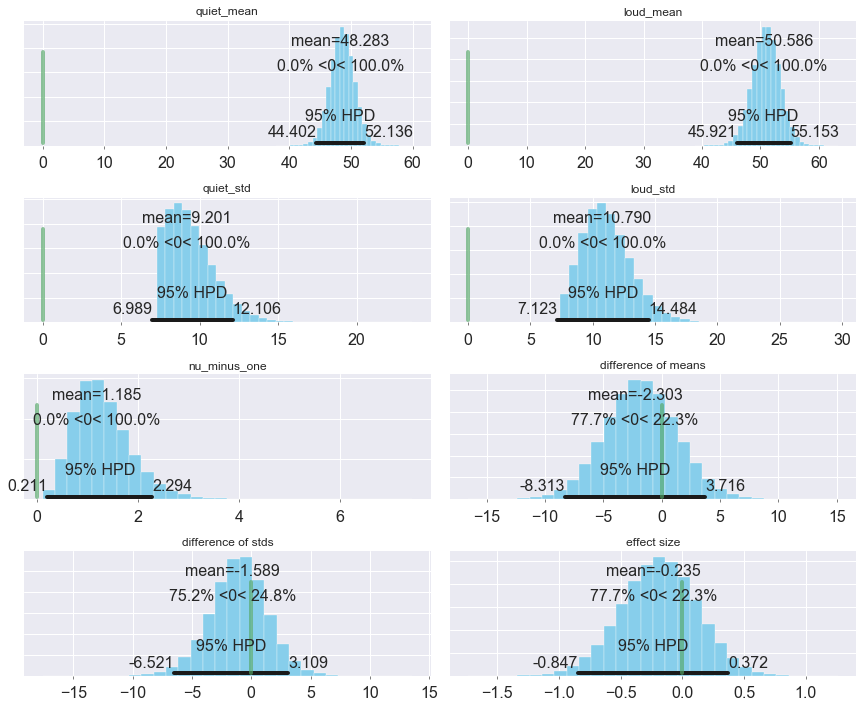

In [44]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122eb3e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12522b810>], dtype=object)

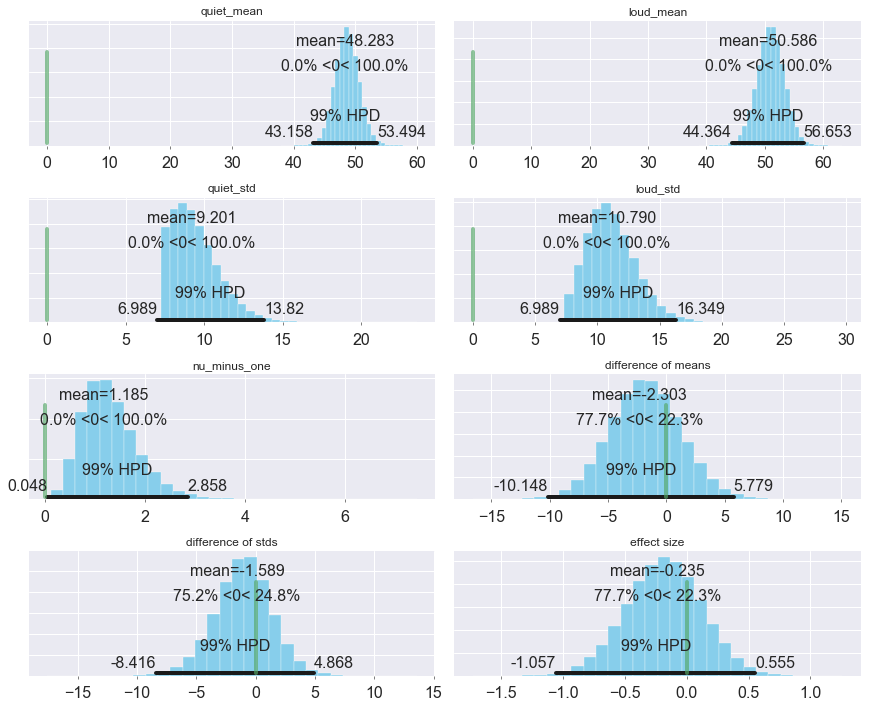

In [45]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Curve Significance

In [53]:
tmp = []
for i in lR[7]:
    if i[0]!='>' and i!='middot':
        tmp.append(i)
print tmp

['4.9', '7.1', '15.8', '8.0', '7.3', '1.4', '4.1', '54.0', '1.9', '5.5', '3.1', '21.3', '18.1', '58.7', '1.8', '5.2', '2.3', '8.5', '2.9', '2.8', '4.0', '10.6', '0', '6.2', '28.5', '8.5', '25.1', '11.8', '3.5', '19.3', '35.5', '12.1', '15.5', '5.5', '21.7', '5.3']


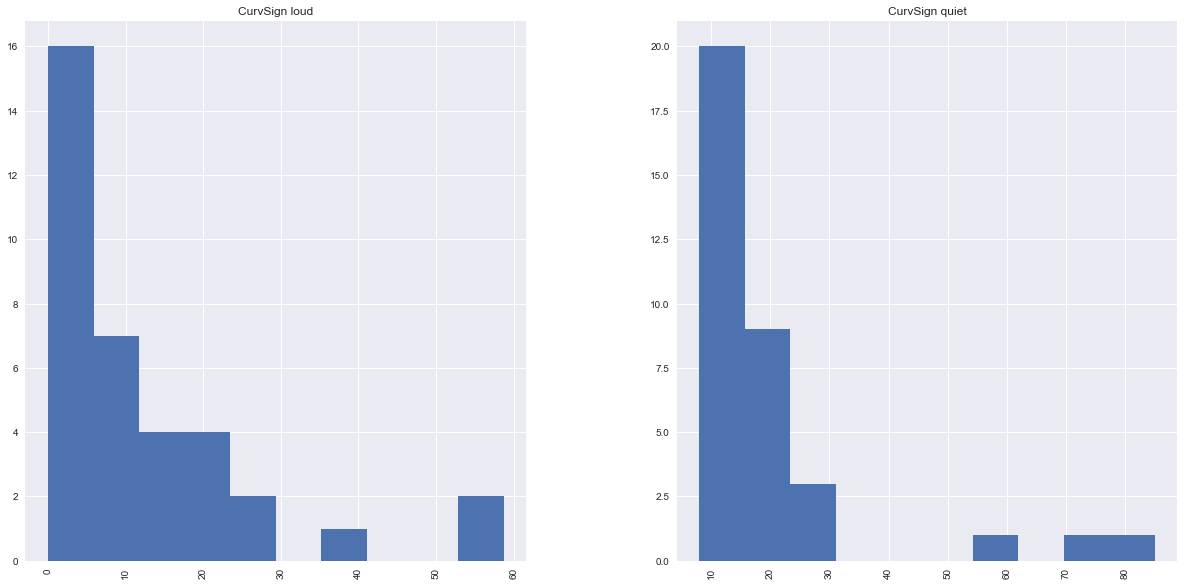

In [54]:
CurvSign_quiet = np.array(map(float, qR[7]))
CurvSign_loud = np.array(map(float, tmp))

y1 = CurvSign_quiet
y2 = CurvSign_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['CurvSign quiet']*len(CurvSign_quiet), ['CurvSign loud']*len(CurvSign_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [55]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [56]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [06:14<00:00, 587.60it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ab158d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ea2f3d0>], dtype=object)

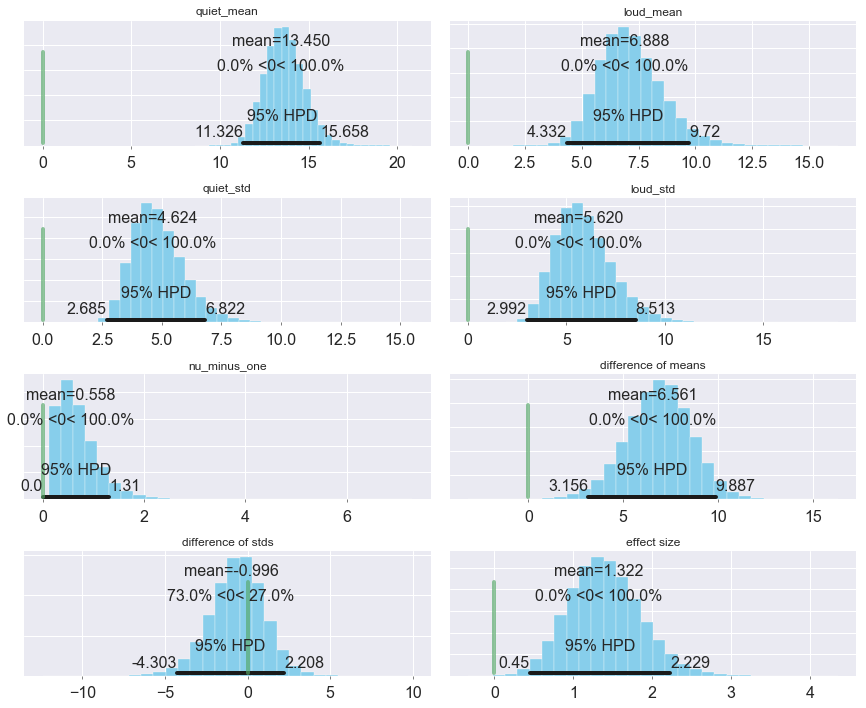

In [57]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117276dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1234c3650>], dtype=object)

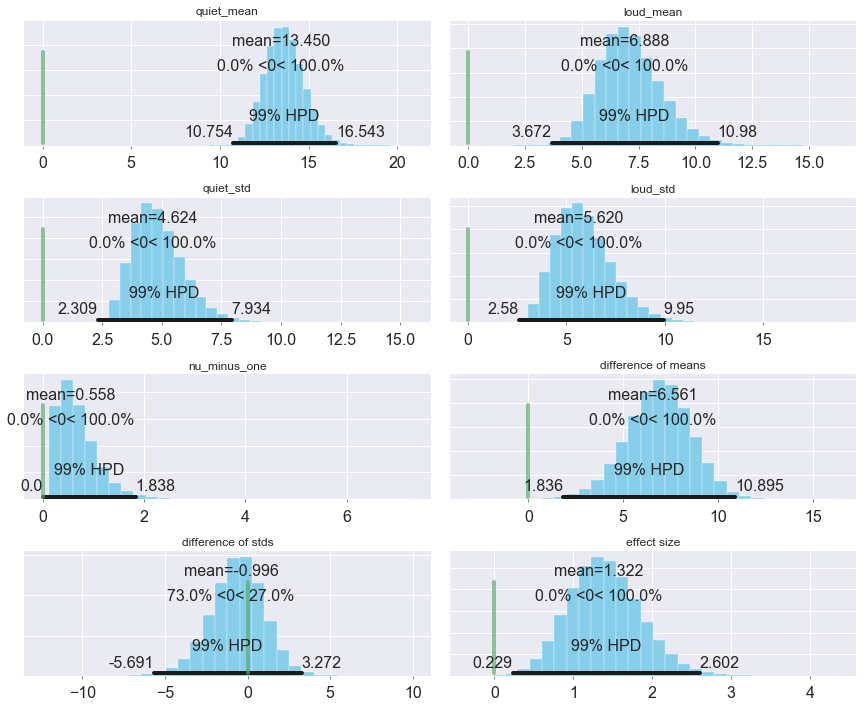

In [58]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Ecut

In [65]:
tmp=[]
for i in qR[8]:
    if i[0]!='>' and i!='middot':
        tmp.append(i[0:3])
print tmp

['4.7', '2.7', '0.8', '0.6', '2.7', '2.2', '3.2', '2.5', '2.8', '2.4', '4.1', '5.5', '2.2', '2.9', '2.5', '1.9', '1.5', '3.6', '3.4', '2.6', '2.2', '2.0', '4.1', '2.2', '2.9', '3.3', '1.0', '2.0', '2.6', '1.9', '1.7', '1.1', '5.0', '1.3', '2.1']


In [67]:
tmp2=[]
for j in lR[8]:
    if j[0]!='>' and j!='middot':
        tmp2.append(j[0:3])
print tmp2

['1.6', '1.6', '4.2', '6.0', '0.4', '1.6', '3.0', '0.5', '6.0', '4.6', '3.0', '1.4', '1.3', '6.0', '3.2', '2.1', '0.9', '1.6', '4.6', '6.0', '0.8', '4.2', '1.4', '1.2', '0.9', '1.9', '3.0', '0.9', '2.5', '3.0', '1.5', '3.2', '1.2', '4.3', '3.0']


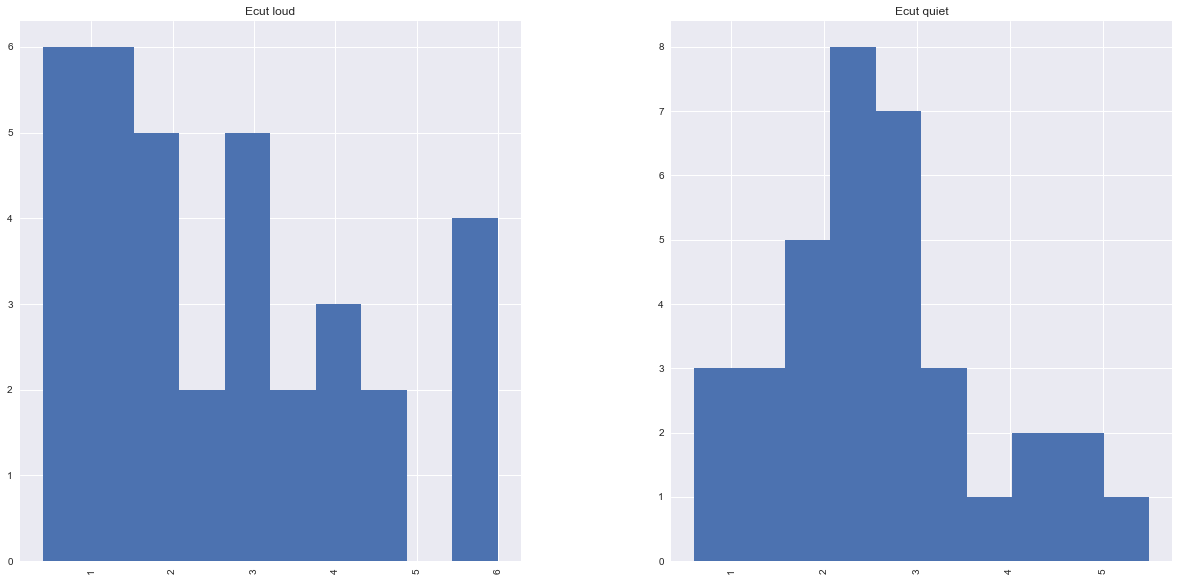

In [69]:
Ecut_quiet = np.array(map(float, tmp))
Ecut_loud = np.array(map(float, tmp2))

y1 = Ecut_quiet
y2 = Ecut_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Ecut quiet']*len(Ecut_quiet), ['Ecut loud']*len(Ecut_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [70]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [73]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [05:51<00:00, 712.09it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ea72250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b57bd10>], dtype=object)

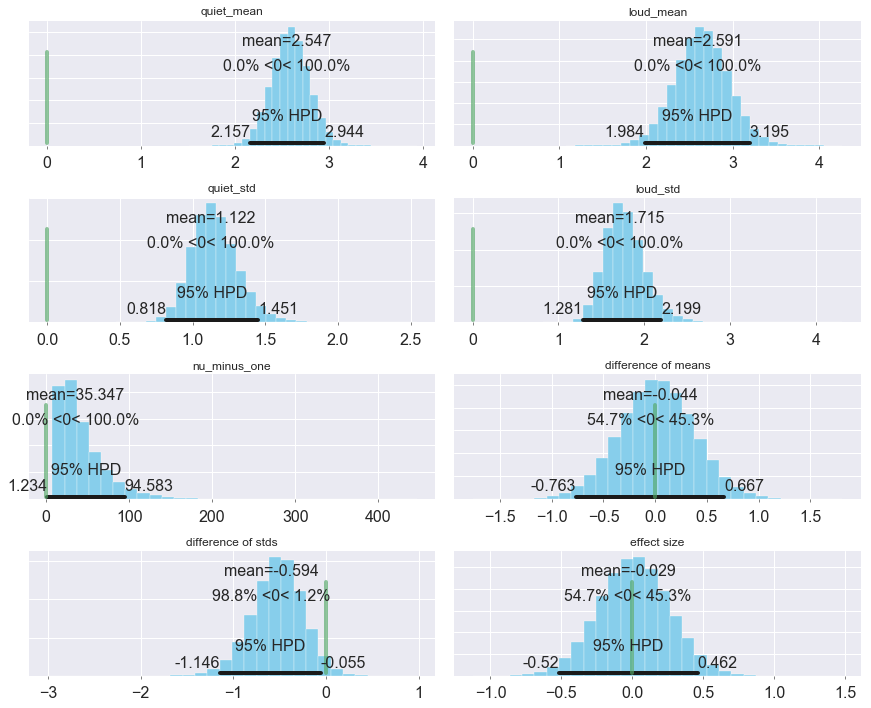

In [74]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bf86250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12b581910>], dtype=object)

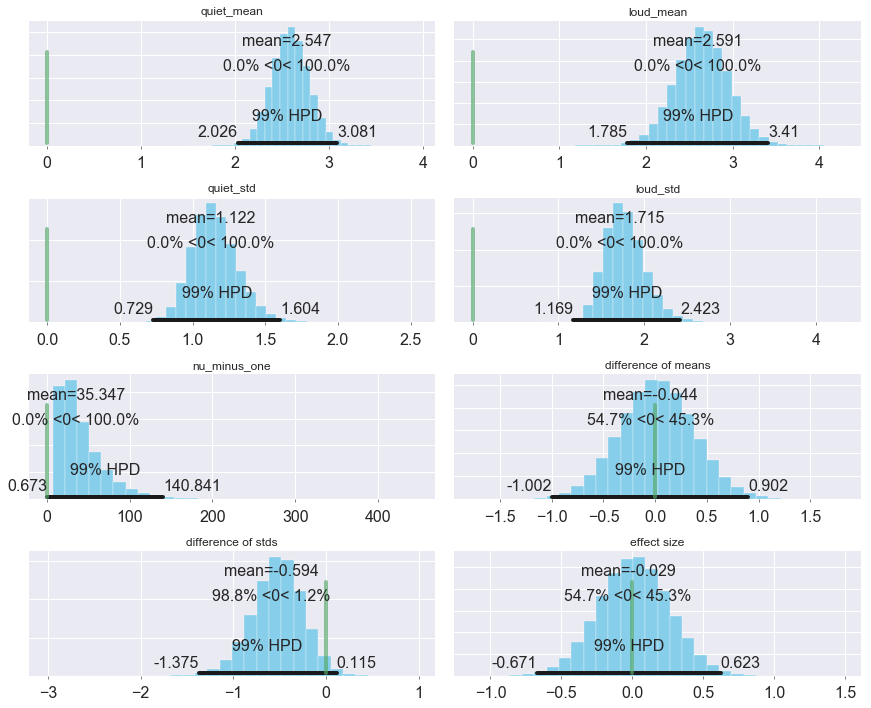

In [75]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Lorentz

In [76]:
tmp=[]
for i in qR[9]:
    if i[0]!='>' and i!='middot':
        tmp.append(i[0:3])
print tmp

['1.4', '1.2', '1.0', '0.6', '1.4', '1.2', '2.0', '1.7', '1.8', '1.7', '1.5', '1.8', '1.6', '2.0', '1.3', '1.0', '1.4', '1.6', '1.6', '1.9', '1.6', '1.2', '1.6', '0.7', '1.6', '1.6', '1.3', '1.4', '1.6', '1.2', '1.6', '1.0', '1.7', '1.3', '1.6']


In [77]:
tmp2=[]
for j in lR[9]:
    if j[0]!='>' and j!='middot':
        tmp2.append(j[0:3])
print tmp2

['1.8', '1.8', '1.9', '1.8', '1.7', '1.7', '1.5', '1.0', '1.8', '1.7', '1.6', '1.0', '1.5', '1.6', '1.8', '1.8', '1.8', '1.5', '1.9', '1.6', '1.1', '1.6', '1.5', '1.5', '1.1', '1.6', '1.5', '0.9', '1.5', '1.7', '0.7', '1.1', '1.4', '1.8', '1.5']


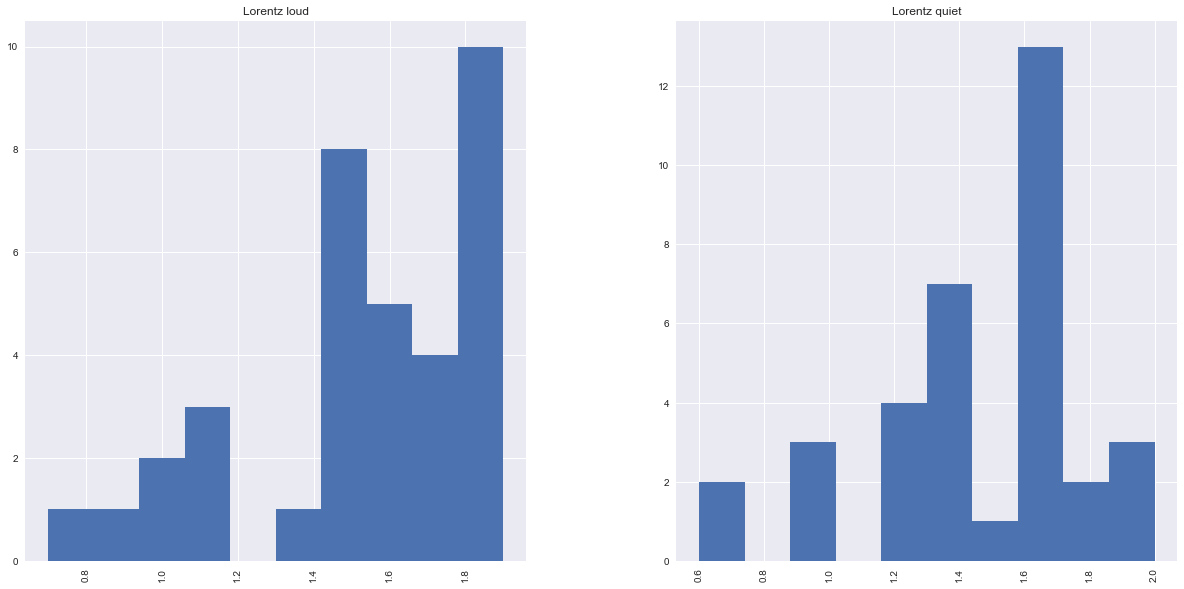

In [78]:
Lorentz_quiet = np.array(map(float, tmp))
Lorentz_loud = np.array(map(float, tmp2))

y1 = Lorentz_quiet
y2 = Lorentz_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Lorentz quiet']*len(Lorentz_quiet), ['Lorentz loud']*len(Lorentz_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [79]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [82]:
with model:
    trace = pm.sample(200000, tune=50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 250000/250000 [06:05<00:00, 683.91it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x123ae8650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12be14d50>], dtype=object)

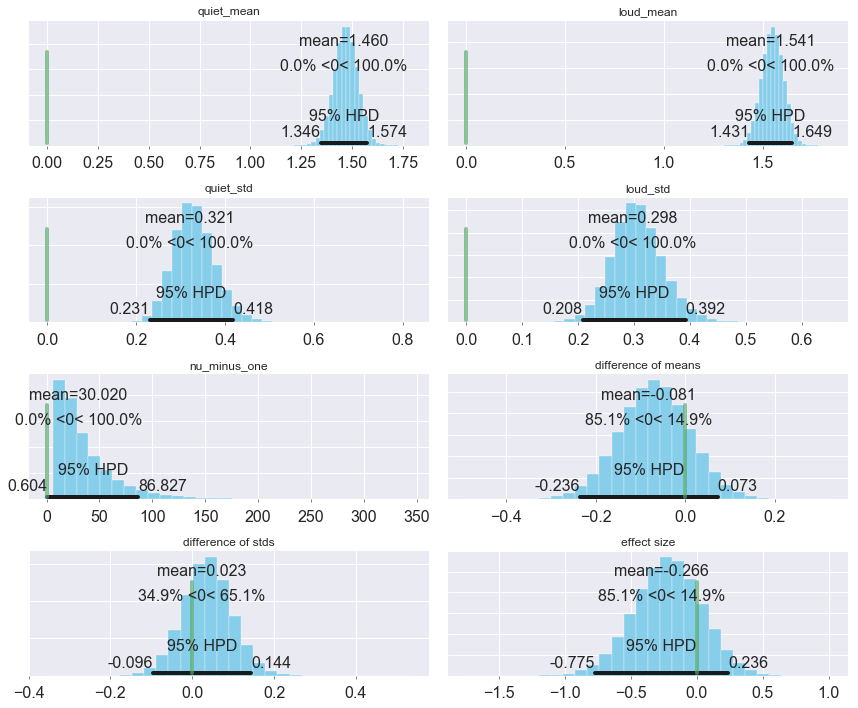

In [83]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123c4dc10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1222c1fd0>], dtype=object)

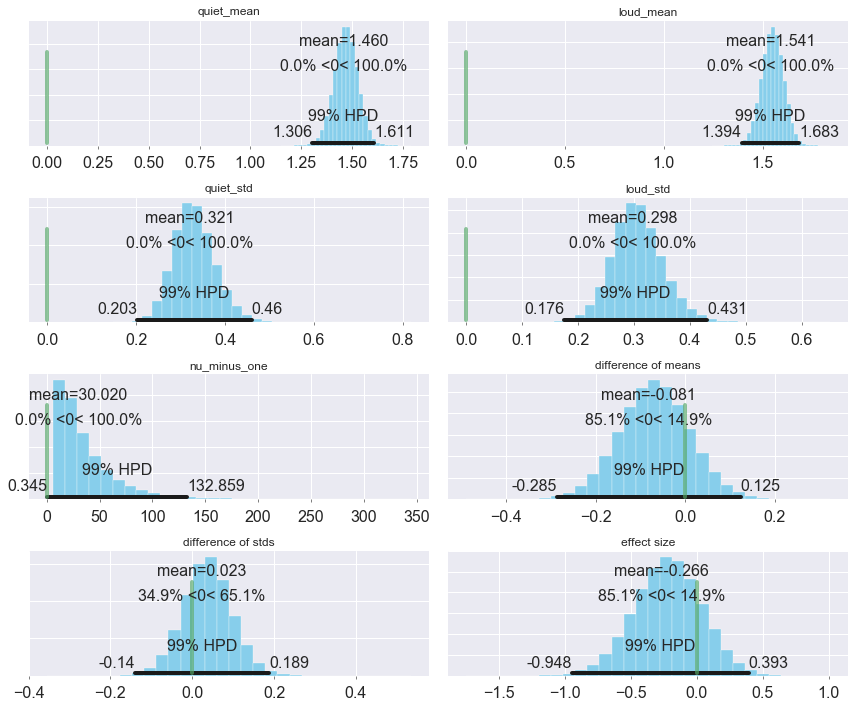

In [84]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# FgOverFx

In [85]:
for i in qR[10]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

4320 1000 1510 8520 2070 1700 1290 1120 8400 1520 5260 3590 1840 3420 19500 2130 4410 667 64600 1240


In [89]:
FgOverFx_quiet = np.array([4320,1000,1510,8520,2070,1700,1290,1120,8400,1520,5260,
                           3590,1840,3420,19500,2130,4410,667,64600,1240])

In [91]:
for i in lR[10]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

29.7 0.296 61.8 1410 370 5390 4000 1950 1070 483 63.1 809 1060 2380 0.612 3150 3560 753 187 43.3 75.3 8.89 33.9 2300 5110 453 49.4


In [92]:
FgOverFx_loud = np.array([29.7,0.296,61.8,1410,370,5390,4000,1950,1070,483,63.1,809,
                          1060,2380,0.612,3150,3560,753,187,43.3,75.3,8.89,33.9,2300,5110,453,49.4])

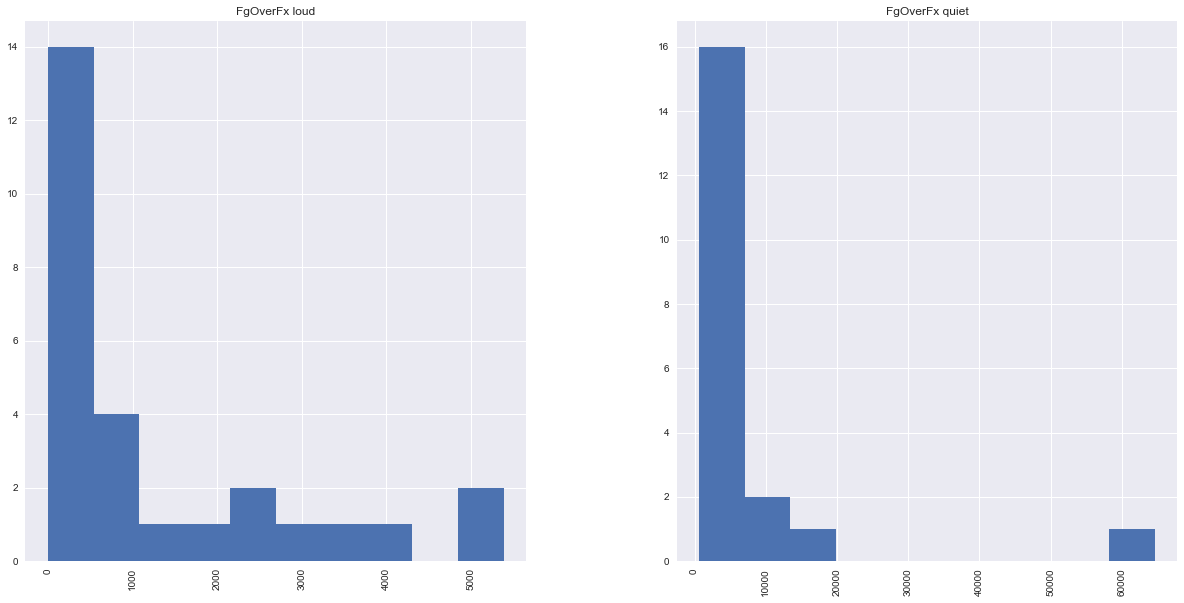

In [93]:
y1 = FgOverFx_quiet
y2 = FgOverFx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['FgOverFx quiet']*len(FgOverFx_quiet), ['FgOverFx loud']*len(FgOverFx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [94]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [95]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:25<00:00, 676.00it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.899593977023, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1222e7310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12d1c74d0>], dtype=object)

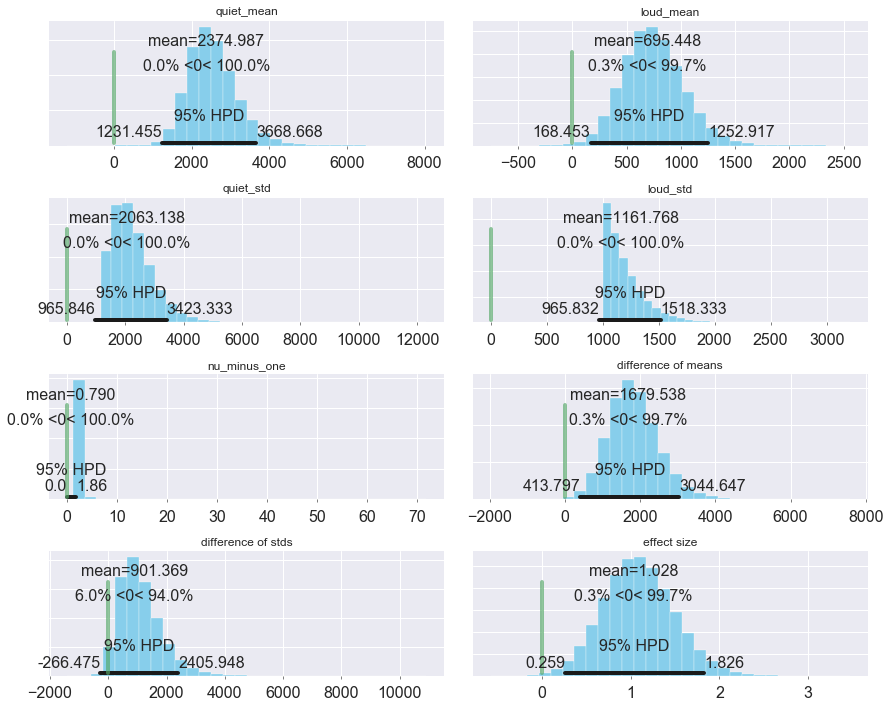

In [96]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bd08210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12bc12350>], dtype=object)

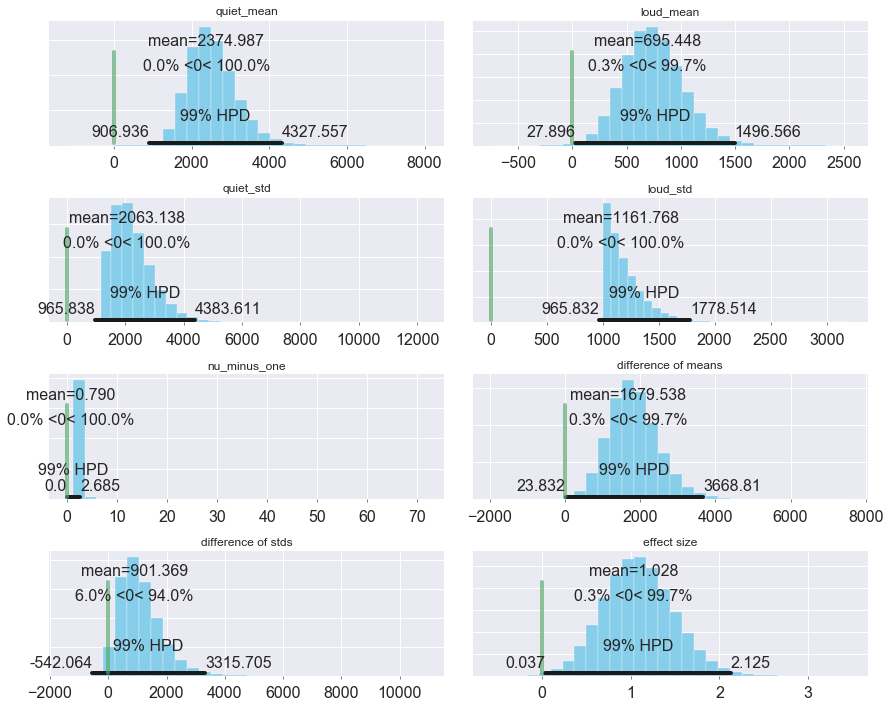

In [97]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# FWHM

In [4]:
for i in qR[11]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

0.216 0.487 0.457 0.476 0.508 0.474 0.373 0.372 0.467 0.479 0.231 0.419 0.176 0.394 0.358 0.489 0.48 0.537 0.298 0.244 0.398 0.456 0.454 0.687 0.451 0.505 0.113 0.337 0.502


In [5]:
for i in qR[12]:
    if i[0]!='>' and i!='middot':
        print i,

0.2123 0.2627 0.3138 0.085 0.2652 0.1434


In [8]:
FWHM_quiet = np.array([0.216,0.487,0.457,0.476,0.508,0.474,0.373,0.372,0.467,0.479,0.231,0.419,0.176,
                       0.394,0.358,0.489,0.48,0.537,0.298,0.244,0.398,0.456,0.454,0.687,0.451,0.505,
                       0.113,0.337,0.502,0.2123,0.2627,0.3138,0.085,0.2652,0.1434])

In [6]:
for i in lR[11]:
    if i[0]!='>' and i!='middot':
        a = 0
        tmp=[]
        while i[a]!='+' and i[a]!='-':
            tmp.append(i[a])
            a+=1
        print ''.join(map(str, tmp)),

0.503 0.407 0.433 0.501 0.423 0.475 0.426 0.307 0.504 0.457 0.204 0.499 0.458 0.312 0.264 0.298 0.244 0.419 0.244 0.392 0.496 0.447 0.421 0.478 0.478 0.309 0.516 0.432 0.299 0.476


In [7]:
for i in lR[12]:
    if i[0]!='>' and i!='middot':
        print i,

0.1968 0.2216 0.1596 0.0423 0.0909 0.1631 0.0521 0.2637 0.1912 0.0607 0.2446 0.1899


In [9]:
FWHM_loud = np.array([0.503,0.407,0.433,0.501,0.423,0.475,0.426,0.307,0.504,0.457,0.204,0.499,0.458,
                      0.312,0.264,0.298,0.244,0.419,0.244,0.392,0.496,0.447,0.421,0.478,0.478,0.309,
                      0.516,0.432,0.299,0.476,0.1968,0.2216,0.1596,0.0423,0.0909,0.1631,0.0521,0.2637,
                      0.1912,0.0607,0.2446,0.1899])

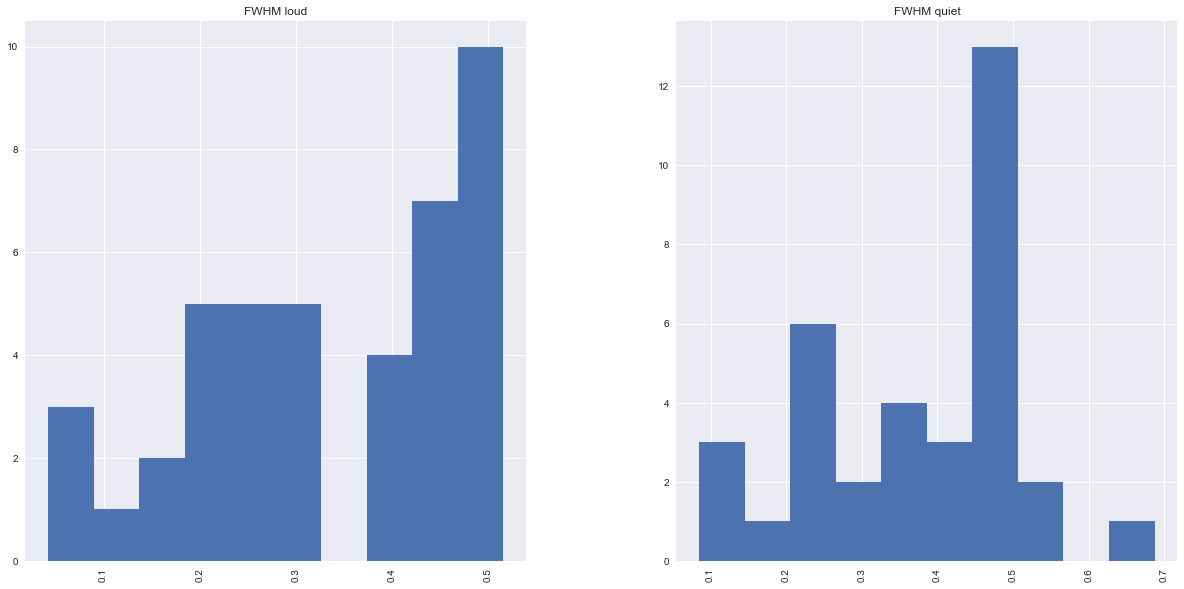

In [10]:
y1 = FWHM_quiet
y2 = FWHM_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['FWHM quiet']*len(FWHM_quiet), ['FWHM loud']*len(FWHM_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [11]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [12]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [03:43<00:00, 984.71it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115ac0650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118229050>], dtype=object)

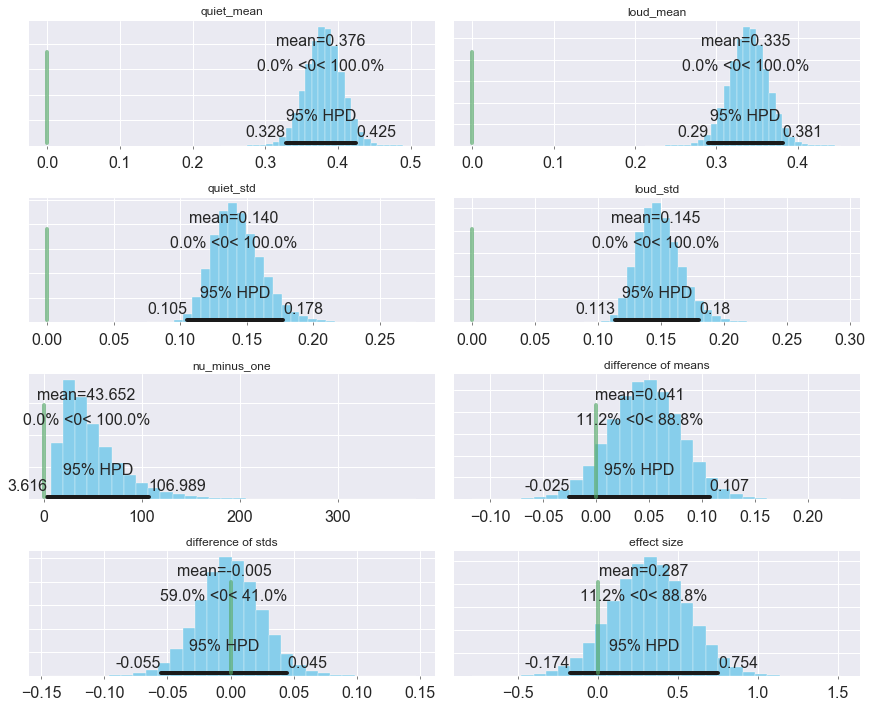

In [13]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a445d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114099cd0>], dtype=object)

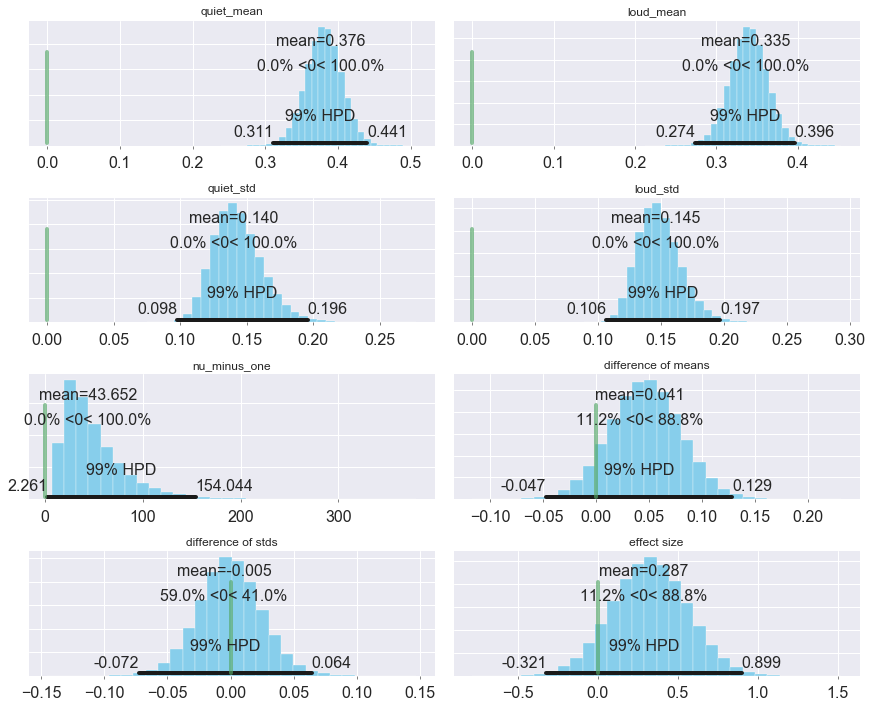

In [14]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Bs

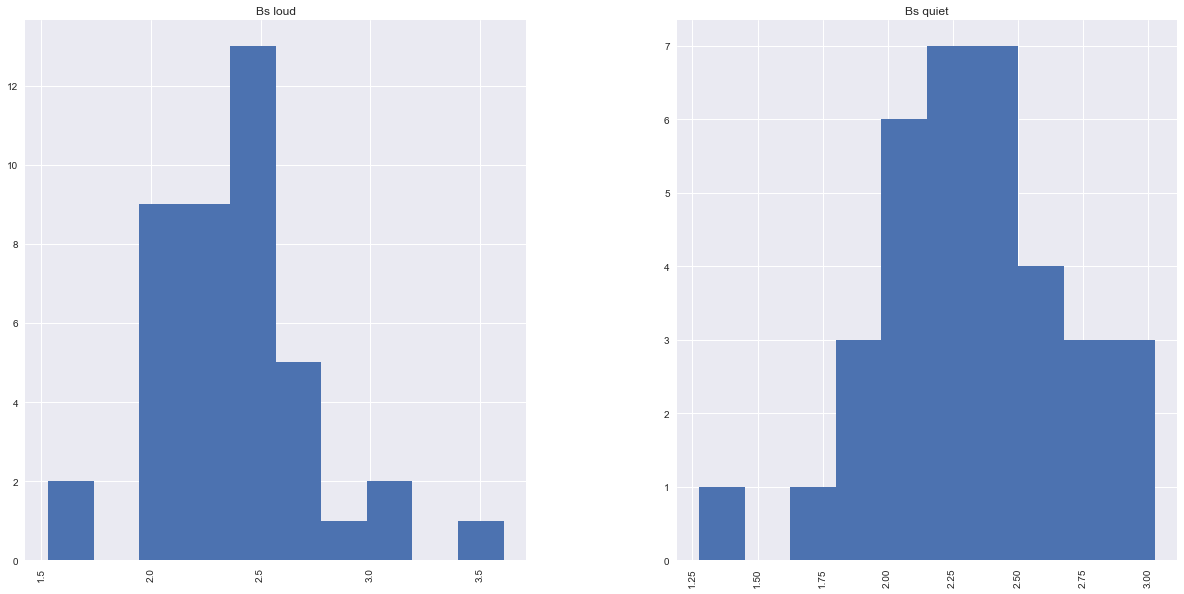

In [7]:
log_Bs_quiet = np.array(map(float, qR[3]))
log_Bs_loud = np.array(map(float, lR[3]))

y1 = np.log10(log_Bs_quiet)
y2 = np.log10(log_Bs_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Bs quiet']*len(log_Bs_quiet), ['log_Bs loud']*len(log_Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [8]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [9]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:24<00:00, 677.30it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110110050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110311bd0>], dtype=object)

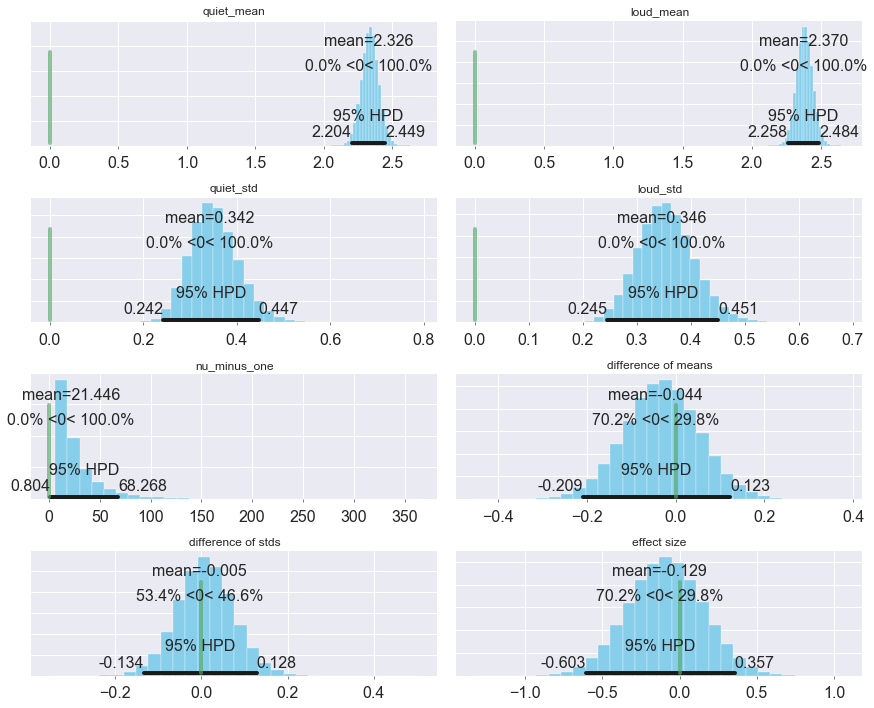

In [10]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1198f3490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dfb2c10>], dtype=object)

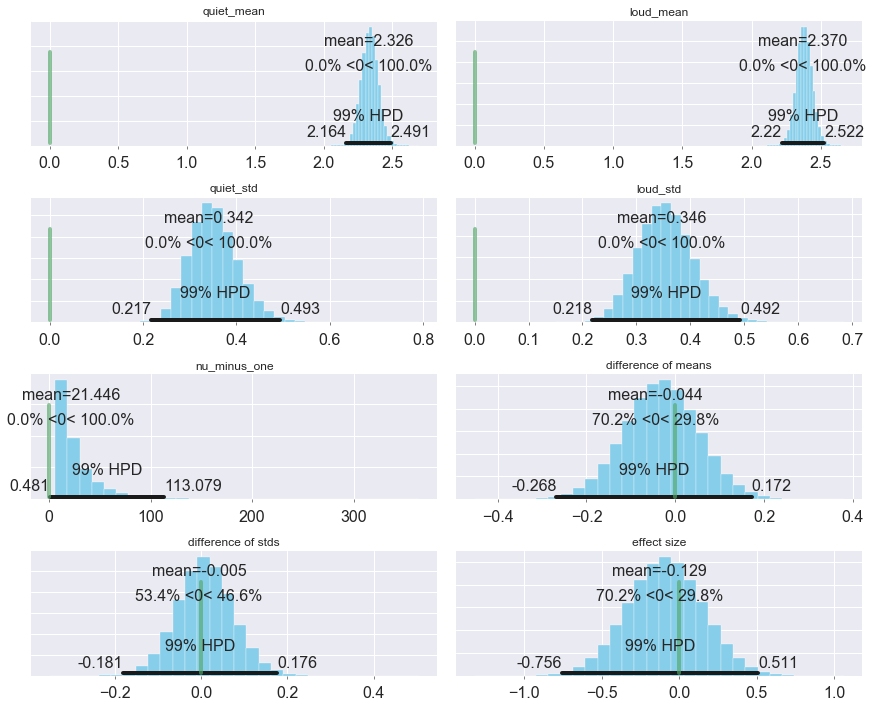

In [11]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Blc

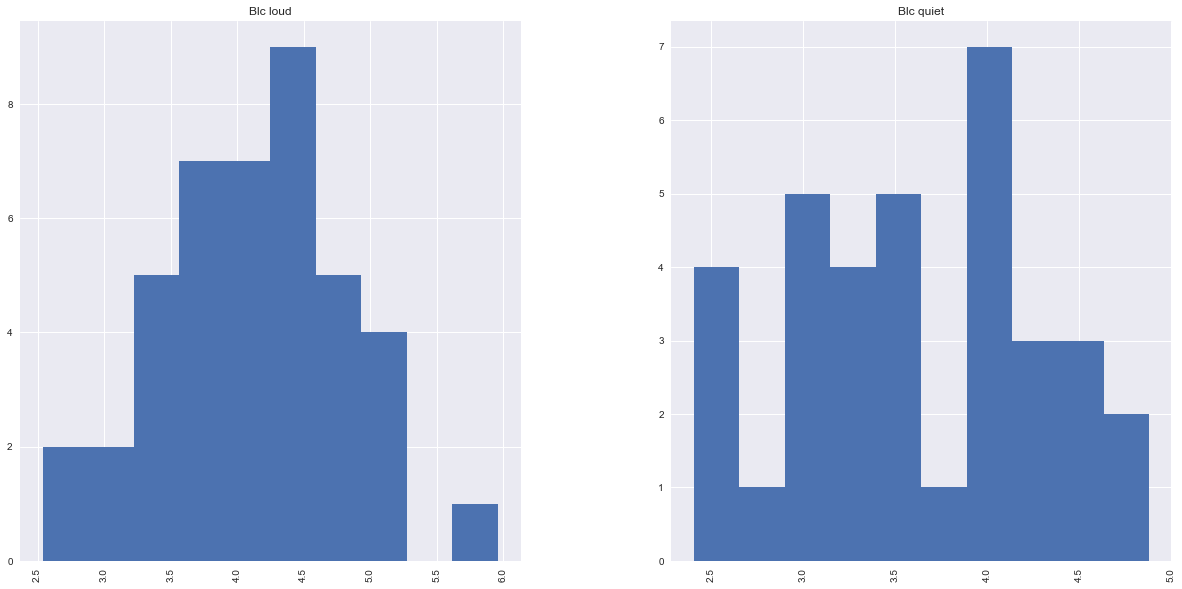

In [12]:
log_Blc_quiet = np.array(map(float, qR[4]))
log_Blc_loud = np.array(map(float, lR[4]))

y1 = np.log10(log_Blc_quiet)
y2 = np.log10(log_Blc_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Blc quiet']*len(log_Blc_quiet), ['log_Blc loud']*len(log_Blc_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [13]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [14]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [04:14<00:00, 864.33it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11092c910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10de3de50>], dtype=object)

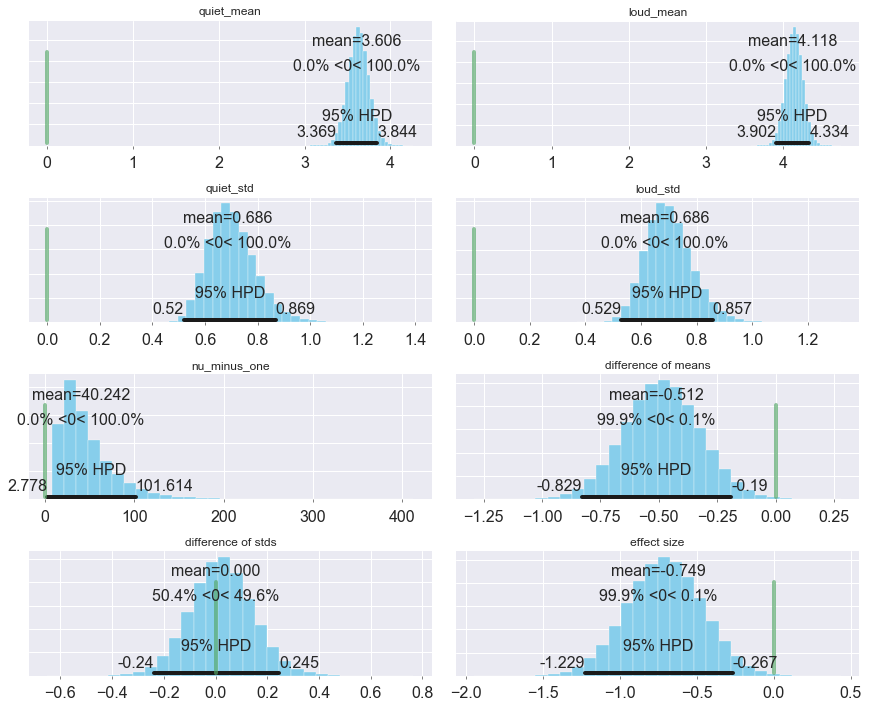

In [15]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1150538d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113433910>], dtype=object)

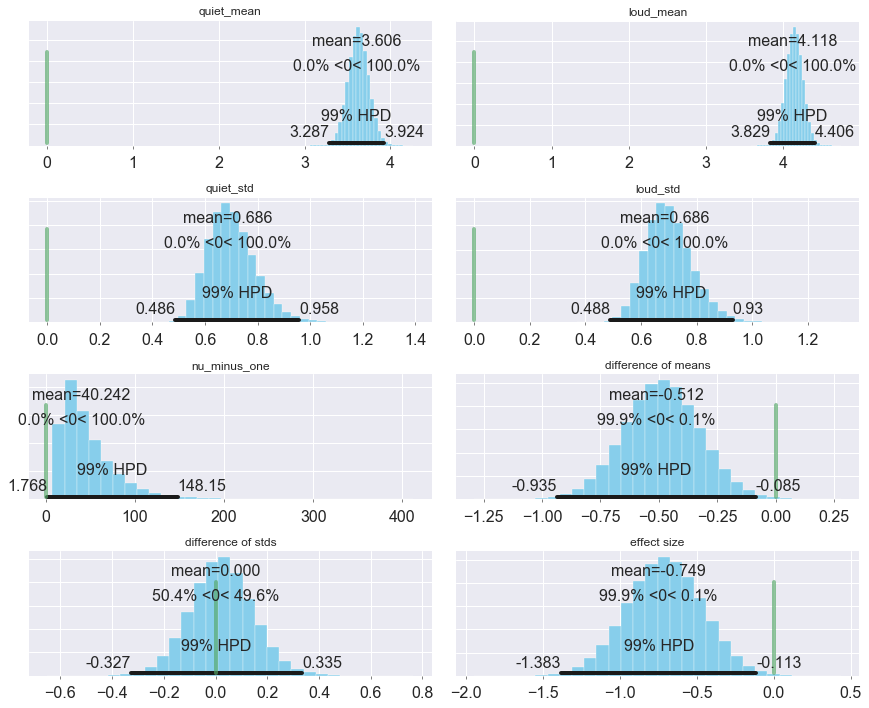

In [16]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log FgOverFx

In [18]:
log_FgOverFx_quiet = np.log10(np.array([4320,1000,1510,8520,2070,1700,1290,1120,8400,1520,5260,
                           3590,1840,3420,19500,2130,4410,667,64600,1240]))

In [20]:
log_FgOverFx_loud = np.log10(np.array([29.7,0.296,61.8,1410,370,5390,4000,1950,1070,483,63.1,809,
                          1060,2380,0.612,3150,3560,753,187,43.3,75.3,8.89,33.9,2300,5110,453,49.4]))

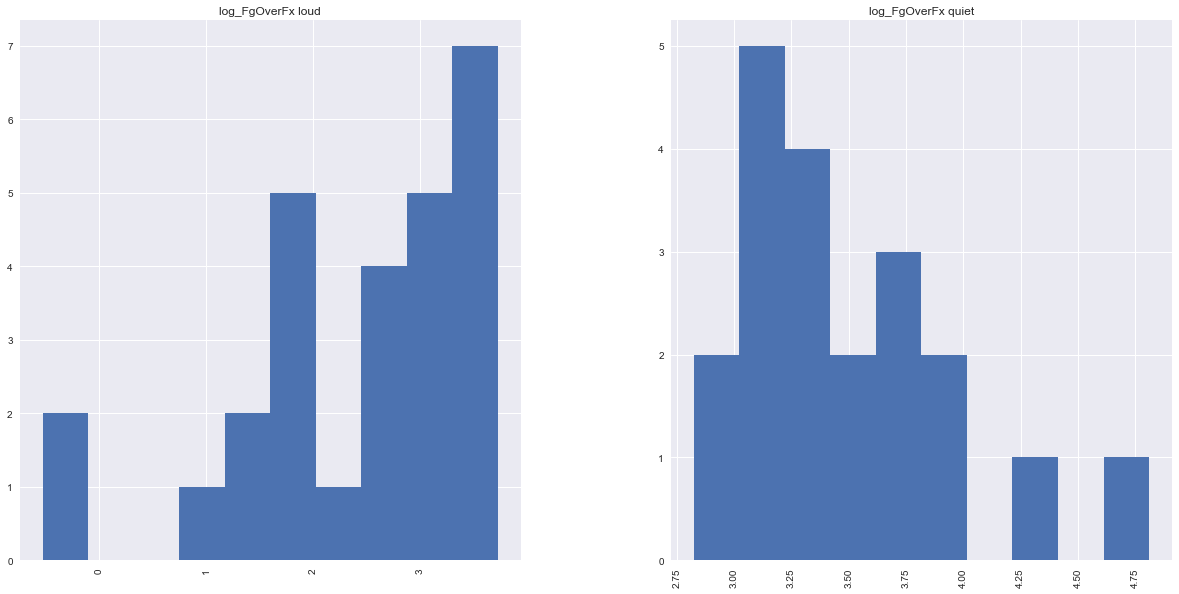

In [21]:
y1 = log_FgOverFx_quiet
y2 = log_FgOverFx_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_FgOverFx quiet']*len(log_FgOverFx_quiet), ['log_FgOverFx loud']*len(log_FgOverFx_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [22]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() * 0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [23]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:21<00:00, 683.40it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113f23910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1135bc290>], dtype=object)

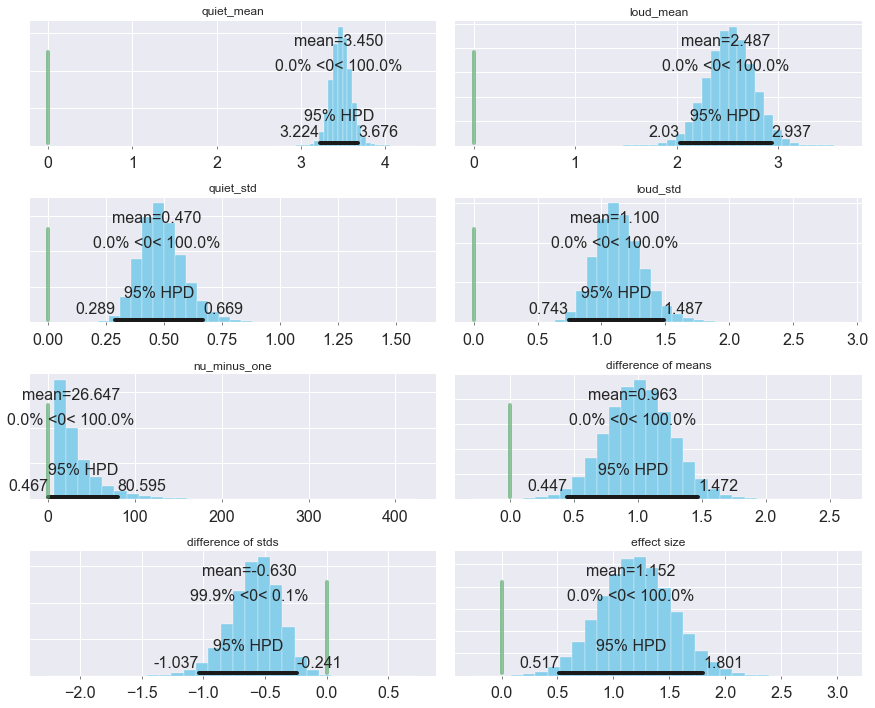

In [24]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113987d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1104a2450>], dtype=object)

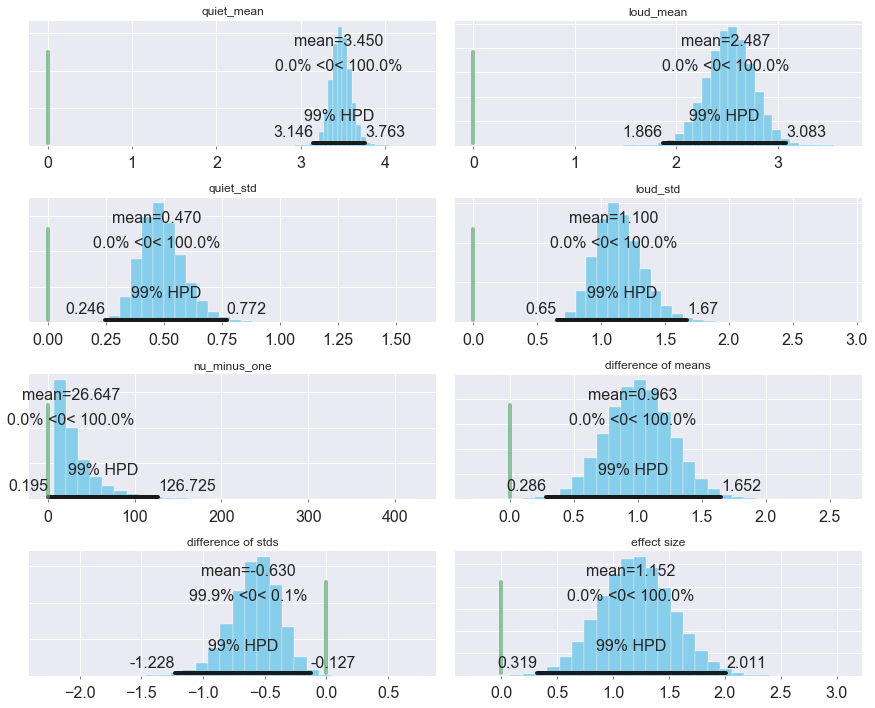

In [25]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log P

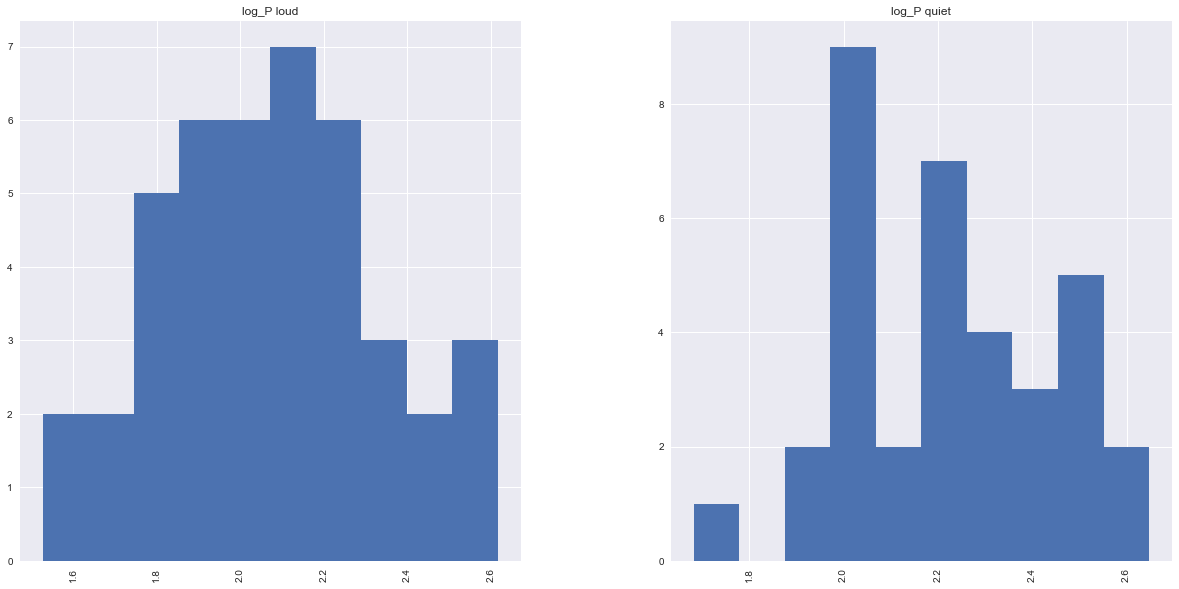

In [30]:
log_P_quiet = np.array(map(float, qR[1]))
log_P_loud = np.array(map(float, lR[1]))

y1 = np.log10(log_P_quiet)
y2 = np.log10(log_P_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_P quiet']*len(log_P_quiet), ['log_P loud']*len(log_P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [31]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [32]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [03:55<00:00, 933.02it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 3 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1140b8950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115846c10>], dtype=object)

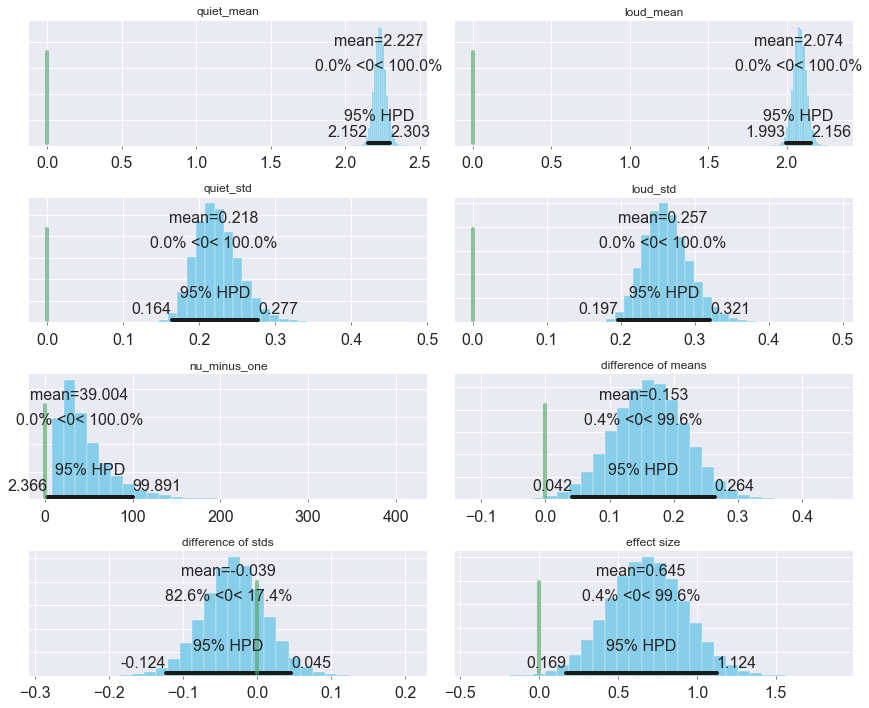

In [33]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1146a5f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118ca1210>], dtype=object)

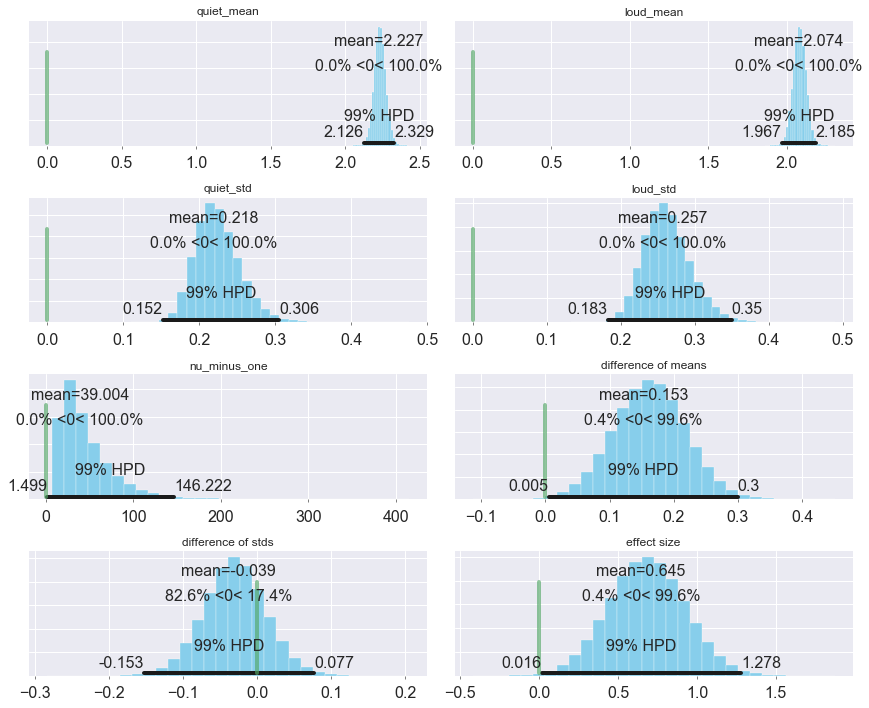

In [34]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Edot

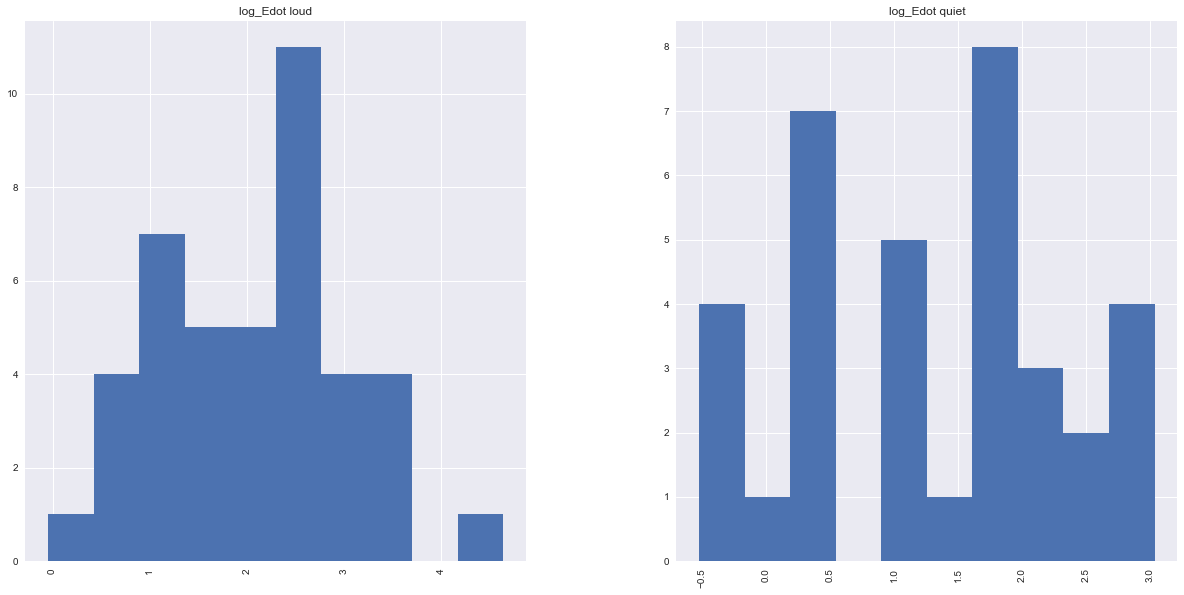

In [35]:
log_Edot_quiet = np.array(map(float, qR[5]))
log_Edot_loud = np.array(map(float, lR[5]))

y1 = np.log10(log_Edot_quiet)
y2 = np.log10(log_Edot_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Edot quiet']*len(log_Edot_quiet), ['log_Edot loud']*len(log_Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [36]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [37]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [05:09<00:00, 711.42it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11460bad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1187161d0>], dtype=object)

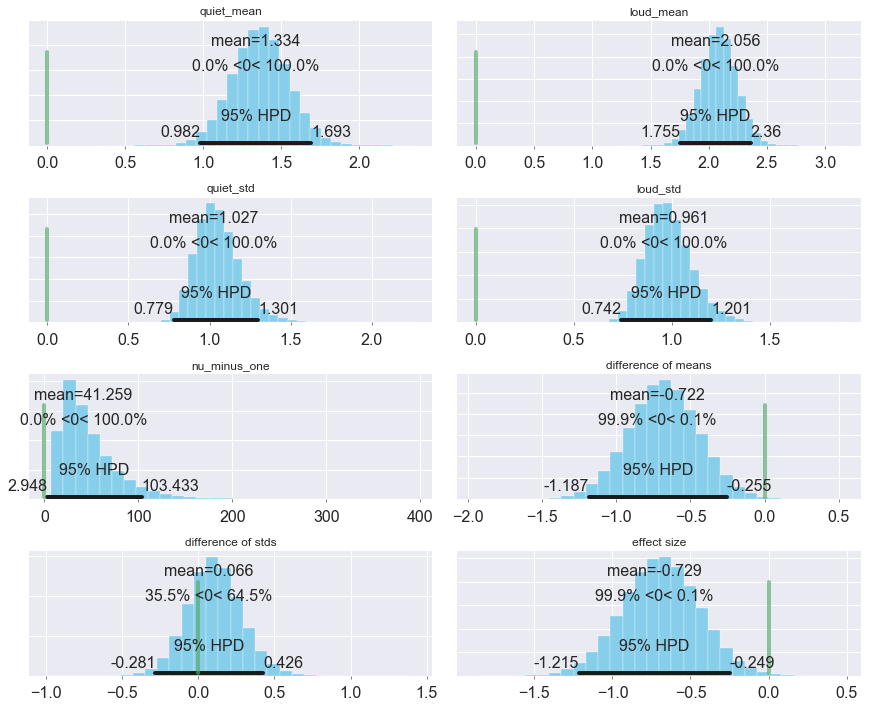

In [38]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119767a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111cfdb10>], dtype=object)

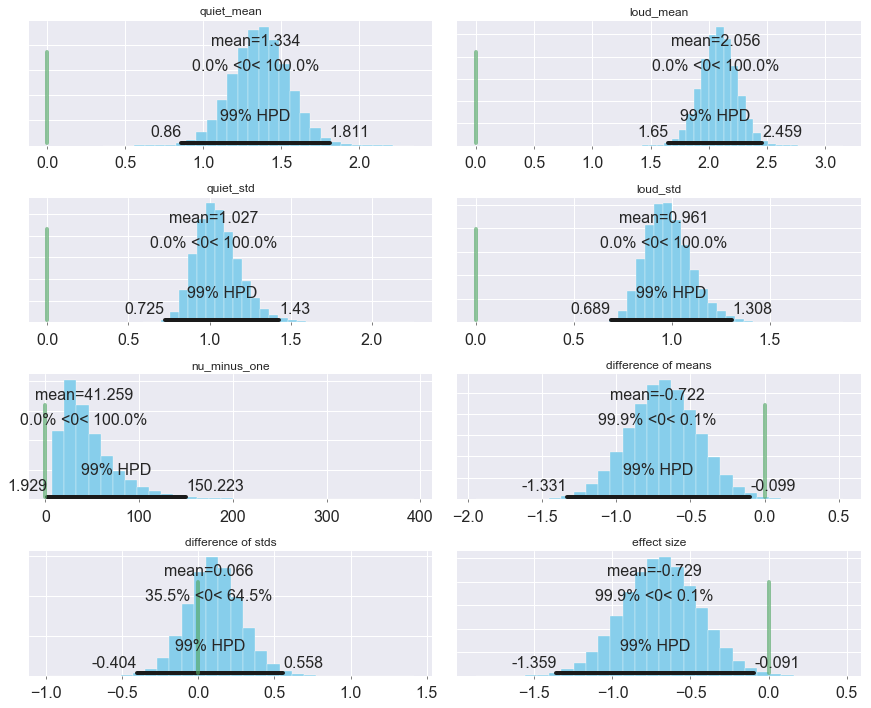

In [39]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

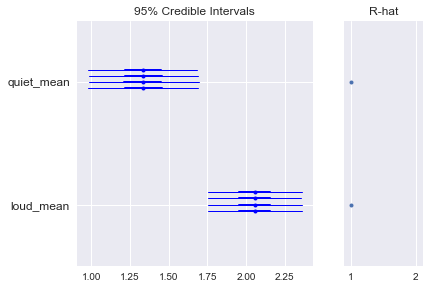

In [40]:
pm.forestplot(trace, varnames=['quiet_mean',
                               'loud_mean']);


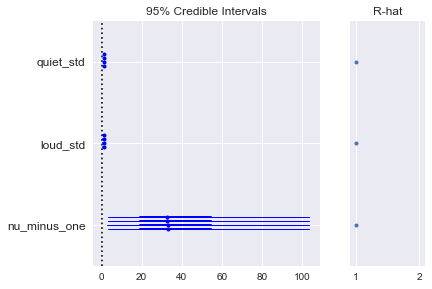

In [41]:
pm.forestplot(trace, varnames=['quiet_std',
                               'loud_std',
                               'nu_minus_one']);